# **Analyse exploratoire des données**



# Découverte des données, analyse univariée

## Découverte des variables

Organisation des variables par groupes et sous-groupes sémantiques :
* **Identification** : identité du relevé de consommation (donc de l'immeuble concerné par le relevé).
* **Location** : localisation spatiale administrative et physique (coordonnées GPS) de l'immeuble.
* **Structure** : forme et dimensions du lot et de la construction, ancienneté.
* **Use types** : destinations principale et secondaires du bien.
* **Scoring** : évaluation ENERGYSTAR du bien.
* **Consumption** : consommation énergétique du bien (en volume, intensité et qualité).
* **Meta** : données sur les données (données extrapolées, conformité, outliers).
* **GHGE emissions** : émission de GES.

## Chargements librairies et dataset

In [1]:
from pepper_commons import *
from pepper_univar import *

✔ _data loaded
✔ struct loaded


Data source : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

In [3]:
from pepper_commons import get_data
data = get_data()
display(data)

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,...,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,...,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,...,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,...,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,...,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,...,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,...,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,...,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99


## Informations de base

### Structure

In [4]:
print_subtitle('basic infos')
print(bold('dimensions'), ':', data.shape)
print(bold('size'), ':', *format_iB(getsizeof(data)))
print(bold('info'), ':')
data.info()


basic infos
dimensions : (3376, 45)
size : 3.776 MiB
info :
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3376 entries, 1 to 50226
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   DataYear                         3376 non-null   int64  
 1   BuildingType                     3376 non-null   object 
 2   PrimaryPropertyType              3376 non-null   object 
 3   PropertyName                     3376 non-null   object 
 4   Address                          3376 non-null   object 
 5   City                             3376 non-null   object 
 6   State                            3376 non-null   object 
 7   ZipCode                          3360 non-null   float64
 8   TaxParcelIdentificationNumber    3376 non-null   object 
 9   CouncilDistrictCode              3376 non-null   int64  
 10  Neighborhood                     3376 non-null   object 
 11  Latitude            

### Description

In [5]:
print_subtitle('basic stats')
data.describe(include='all').T


basic stats


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
DataYear,3376.0,NaN,NaN,NaN,2016.0,0.0,2016.0,2016.0,2016.0,2016.0,2016.0
BuildingType,3376,8,NonResidential,1460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrimaryPropertyType,3376,24,Low-Rise Multifamily,987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PropertyName,3376,3362,Northgate Plaza,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,3376,3354,2600 SW Barton St,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,3376,1,Seattle,3376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,3376,1,WA,3376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZipCode,3360.0,NaN,NaN,NaN,98116.949107,18.615205,98006.0,98105.0,98115.0,98122.0,98272.0
TaxParcelIdentificationNumber,3376,3268,1625049001,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CouncilDistrictCode,3376.0,NaN,NaN,NaN,4.439277,2.120625,1.0,3.0,4.0,7.0,7.0


## Production du dictionnaire des données

In [ ]:
import pepper_univar as univ
from gspread_pandas import Spread
spread = Spread('1gtTOd-taN9aY8sg4PGY456E2AlsMxi2W_-7kZaCSYlA')       # target GSheet
data_on_data = univ.data_report(data, 'dataset_vars_analysis.csv')    # build the report dataframe
univ.data_report_to_gsheet(data_on_data, spread, 'data_dict')         # export to 'data_dict' sheet

En bonus sur ce projet un dataset de 'petite' taille (3K x 40) après deux projets bigdata.

Il est donc facile de le charger dans une GSheet pour le visualiser intégralement et opérer l'exploration et le feature engineering en environnement de développement de type tableur.

In [ ]:
from gspread_pandas import Spread

spread = Spread('1gtTOd-taN9aY8sg4PGY456E2AlsMxi2W_-7kZaCSYlA')    # target GSheet TODO : externaliser, spécif. user
as_code = ['OSEBuildingID', 'ZipCode', 'TaxParcelIdentificationNumber']
as_fr_FR = [c for c in data.columns if data[c].dtype == 'float64']
data_to_gsheet(data, spread, 'data', as_code=as_code, as_fr_FR=as_fr_FR, start='A10')

## Variables d'identification

### Type d'immeuble (`BuildingType`)

**Déf**. *Classification des types de construction de la ville de Seattle.*

**NB** > le terme générique *type* serait ici à interpréter en termes de structre, de type de bâti, mais il recoupe évidemment fortement la connotation de *destination* (*usage*).

Ces 8 catégories ont cette structure interne et ces fréquences :
| cat | subcat | freq |
|-|-|-|
| NonResidential || 1546 |
|| NonResidential | 1460 |
|| Nonresidential COS | 85 |
|| Nonresidential WA | 1 |
| Multifamily | 1708 |
|| Multifamily LR (1-4) | 1018 |
|| Multifamily MR (5-9) | 580 |
|| Multifamily HR (10+) | 110 |
| Campus || 122 |
|| SPS-District K-12 | 98 |
|| Campus | 24 |

<mark>TODO</mark> : que signifiant COS, SPS-District, K-12 ?

Signification de LR, MR, HR (cf. modalités de `BuildingType`) :
* **Low-Rise** : immeubles de faible hauteur, de 1 à 4 étages.
* **Mid-Rise** : immeubles de hauteur intermédiaire, de 5 à 9 étages.
* **High-Rise** : immeubles de grande hauteur, de 10 étages et +.

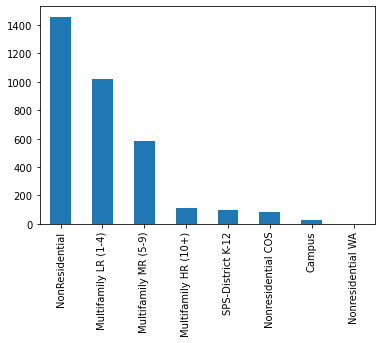

In [7]:
_ = cats_freqs(data, 'BuildingType')

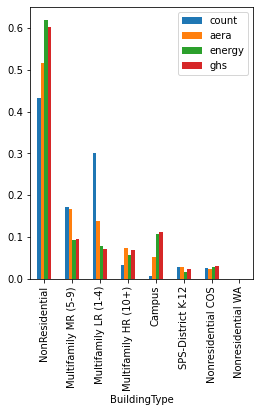

In [8]:
_ = cats_weighted_freqs(data, 'BuildingType',
        ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
        ['aera', 'energy', 'ghs']
    )

### Utilisation principale (`PrimaryPropertyType`)

**Déf**. *L'utilisation principale d'une propriété (par exemple, bureau, magasin de détail). L'utilisation primaire est définie comme une fonction qui représente plus de 50% d'une propriété. Il s'agit du champ Calculé de type propriété - EPA à partir du gestionnaire de portefeuille.*

Destination de la construction.

**NB** > subdivision de la propriété précédente.

Cela a évidemment un impact. Il y a ici des classes à former avec des distinctions à prévoir.


http://www.educationcareerjournal.com/job-types/k-12-teacher/

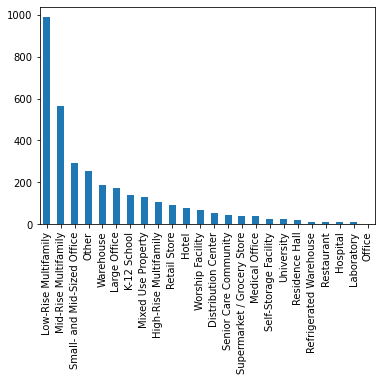

In [9]:
_ = cats_freqs(data, 'PrimaryPropertyType')

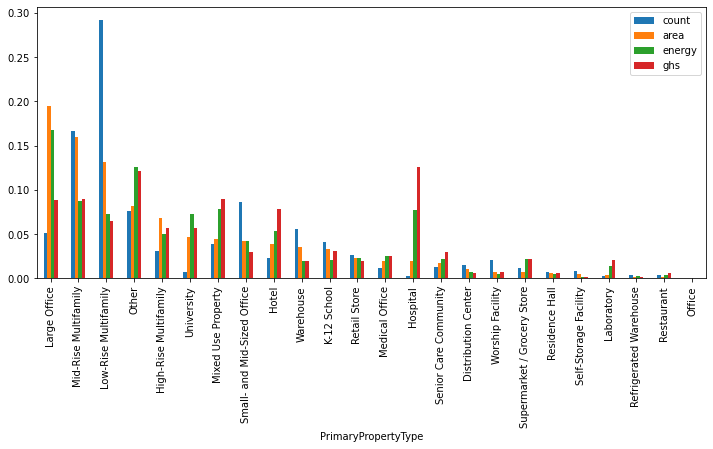

In [10]:
_ = cats_weighted_freqs(data, 'PrimaryPropertyType',
        ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
        ['area', 'energy', 'ghs']
    )

## Variables de situation

Localisation spatiale du bien : localisations administratives et localisation physique.

### Quartier (`Neighborhood`)

Attention : il y a des variations de casse (BALLARD / Ballard, CENTRAL/Central) et même d'expression (Delridge, DELRIDGE, DELRIDGE NEIGHBORHOODS) pour désigner les mêmes quartiers : à normaliser pour la suite.

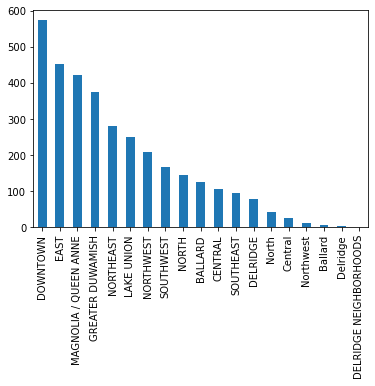

In [11]:
_ = cats_freqs(data, 'Neighborhood')

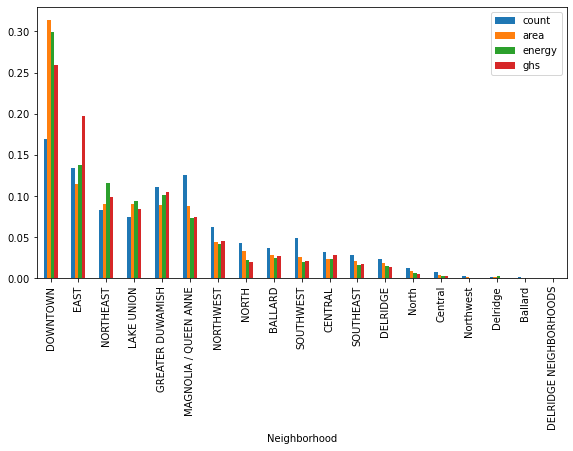

In [12]:
_ = cats_weighted_freqs(data, 'Neighborhood',
        ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
        ['area', 'energy', 'ghs']
    )

## Variables de structure et surfaces principales

### Année de construction (`YearBuilt`)

Cette caractéristique est probablement pertinente.

Les normes de construction évoluent dans le temps, et la prise de conscience des enjeux climatiques est récente en comparaison de l'âge probable de certaines constructions. Intuition à vérifier évidemment.

1900    55
1901     8
1902    11
1903     4
1904    15
        ..
2011    15
2012    35
2013    51
2014    67
2015    37
Name: YearBuilt, Length: 113, dtype: int64

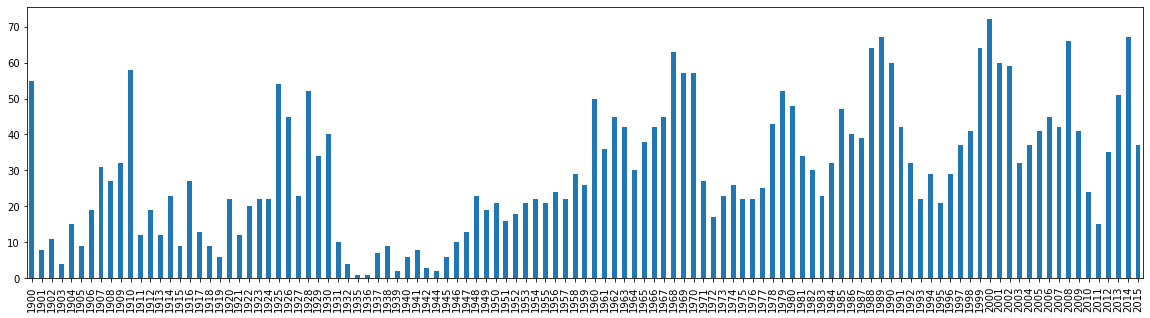

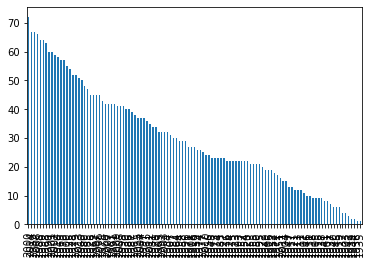

In [13]:
year_built = data.YearBuilt
yb_counts = year_built.value_counts().sort_index()
display(yb_counts)
yb_counts.plot.bar(figsize=(20, 5))
plt.show()
_ = cats_freqs(data, 'YearBuilt')

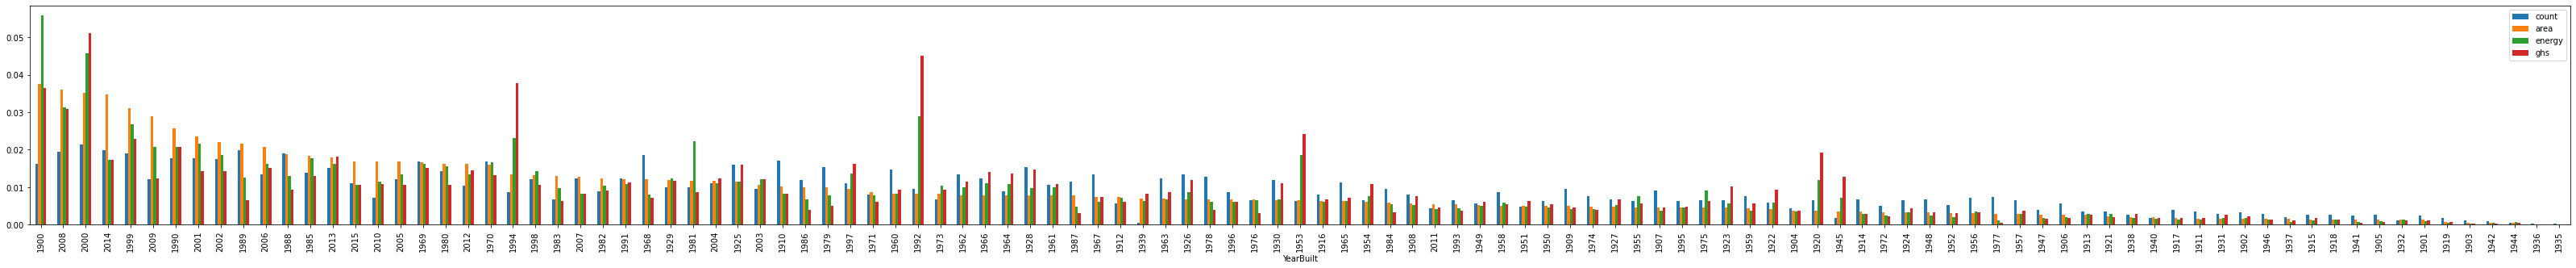

In [14]:
_ = cats_weighted_freqs(data, 'YearBuilt',
        ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
        ['area', 'energy', 'ghs']
    )

### Nombre de bâtiments (`NumberofBuildings`)

Modèle en longue traîne, la majorité des immeubles ne comptent qu'un bâtiment.

Le cas à 0 bâtiments pose question : investiguer.

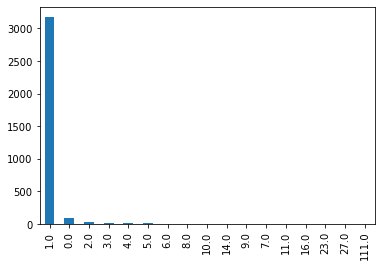

In [15]:
_ = cats_freqs(data, 'NumberofBuildings')

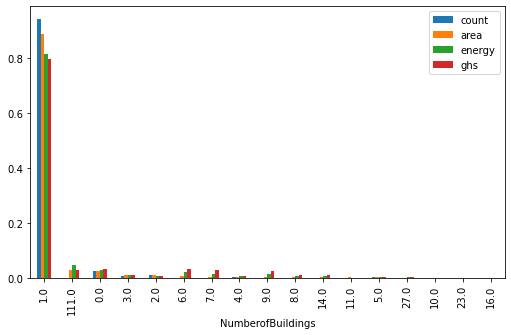

In [16]:
_ = cats_weighted_freqs(data, 'NumberofBuildings',
        ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
        ['area', 'energy', 'ghs']
    )

### Nombre d'étages (`NumberofFloors`)

Là, ça devient intéressant.

A l'intuition, cette propriété est un déterminant principal. A vérifier, évidemment.

Un nombre d'étage nul pose question.

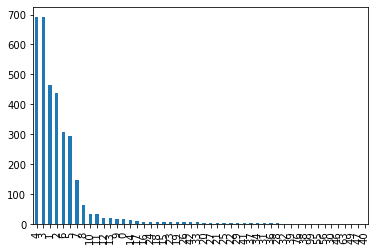

In [18]:
_ = cats_freqs(data, 'NumberofFloors')

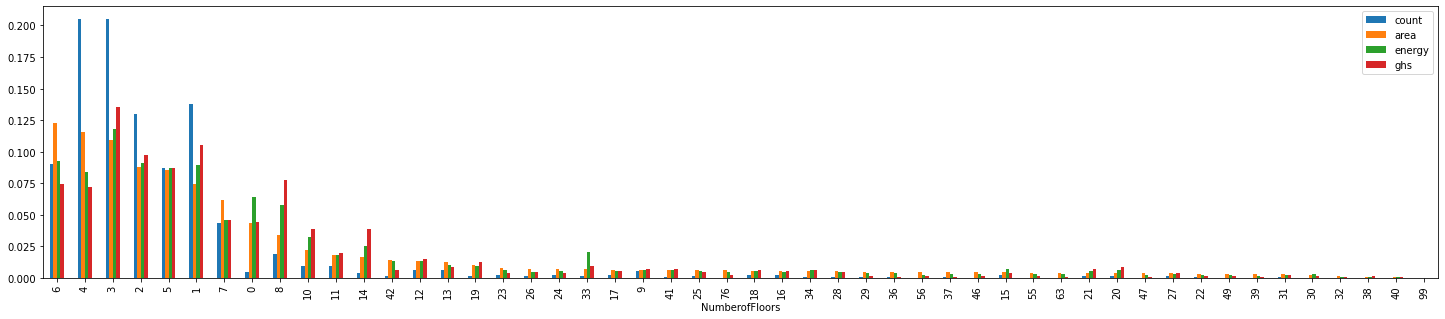

In [19]:
_ = cats_weighted_freqs(data, 'NumberofFloors',
        ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
        ['area', 'energy', 'ghs']
    )

### Surface par étage

En visualisant notamment un centre ville constitué principalement d'immeubles, cela donne une indication sur la base de l'immeuble et dégage l'amorce d'un dimensionnement du problème énergétique non plus relativement à une surface 2D, mais à un un volume 3D.

Il n'en sortira peut-être rien, mais il pourrait en sortir quelque chose de pertinent.

On supprime les cas à nombre d'étages NaN ou 0.

In [20]:
import pandas as pd
d = data[data.NumberofFloors.notna() & (data.NumberofFloors > 0)]
se = pd.Series(d['PropertyGFABuilding(s)'] / d.NumberofFloors, name='se')
data_se = pd.concat([d, se], axis=1)
display(data_se)

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,se
id,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,...,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83,7369.500000
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,...,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86,8045.636364
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,...,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19,18521.756098
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,...,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67,6132.000000
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,...,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88,6310.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,...,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70,12294.000000
50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,...,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01,16000.000000
50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,...,1.792159e+06,39737.390630,3.973739e+06,False,NaN,Compliant,NaN,223.54,16.99,13157.000000


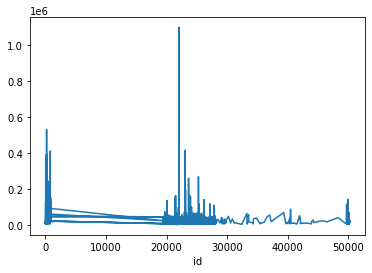

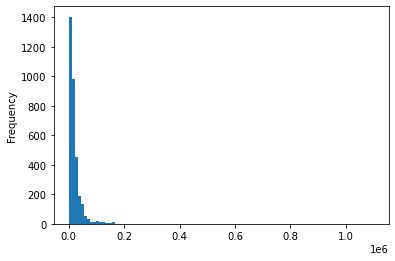

In [21]:
import matplotlib.pyplot as plt
#_ = cats_freqs(data_se, 'se')
label = 'se'
c = data_se[label]
#display(c)
c.plot()
plt.show()
c.plot.hist(bins=100)
plt.show()

Outliers :

In [22]:
c = c.sort_values(ascending=False)
display(c)
display(data.loc[c.index])

id
22062    1.100000e+06
194      5.300390e+05
23071    4.156320e+05
805      4.115840e+05
249      3.907090e+05
             ...     
23521    3.126500e+03
22371    3.115200e+03
27984    2.766000e+03
20885    1.818000e+03
21611    2.216970e+02
Name: se, Length: 3360, dtype: float64

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
22062,2016,Campus,University,Entire Campus,901 12th Avenue,Seattle,WA,98122.0,2254500880,3,...,1.807527e+07,61672821.0,529756.937500,52975694.0,False,NaN,Compliant,NaN,3243.48,1.47
194,2016,NonResidential,Retail Store,Northgate Mall,401 Northgate Way,Seattle,WA,98125.0,2926049025,5,...,4.755138e+06,16224529.0,114925.031300,11492503.0,False,NaN,Compliant,NaN,723.47,1.36
23071,2016,NonResidential,Hospital,Main Hospital - All Wings,Facilities Management MS: B-120,Seattle,WA,98133.0,3026049130,5,...,1.256277e+07,42864158.0,560966.125000,56096612.0,False,NaN,Compliant,NaN,3278.11,7.89
805,2016,NonResidential,Distribution Center,Portside Distribution Center,4050 E. Marginal Way South,Seattle,WA,98134.0,7666207536,2,...,2.198679e+06,7501894.0,75896.851560,7589685.0,False,NaN,Compliant,NaN,455.39,1.11
249,2016,NonResidential,Other,Safeco Field,1250 First Avenue South,Seattle,WA,98134.0,7666206483,2,...,1.190574e+07,40622381.0,181389.203100,18138920.0,False,NaN,Compliant,NaN,1246.55,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23521,2016,Multifamily MR (5-9),Mid-Rise Multifamily,714 BELLEVUE,714 Bellevue Ave E,Seattle,WA,98102.0,7697980000,3,...,2.295453e+05,783209.0,0.000000,0.0,False,NaN,Compliant,NaN,5.46,0.22
22371,2016,Multifamily HR (10+),High-Rise Multifamily,420 Melrose,420 Melrose Ave E,Seattle,WA,98102.0,2617480000,3,...,3.178414e+05,1084475.0,863.890015,86389.0,False,NaN,Compliant,NaN,12.15,0.39
27984,2016,Multifamily MR (5-9),Mid-Rise Multifamily,OAKVIEW APTS,9514 STONE AVE N,Seattle,WA,98103.0,4310701280,5,...,2.704332e+05,922718.0,0.000000,0.0,True,NaN,Error - Correct Default Data,NaN,6.43,0.22


### Surfaces intérieures et extérieures

#### Surfaces extérieures [de stationnement] (`PropertyGFAParking`)

<mark>TODO enquête</mark> Considérer qu'une surface dite de parking est en fait toute la surface extérieure est une interprétation à vérifier. Deux moyens : 1/ demande directe à Seattle 2/ vérifier ma théorie par exemple avec un campus.

property without parking : 2872
property with parking : 504


id
402      512608
438      407795
422      389860
353      368980
263      335109
          ...  
22150       756
50089       604
22838       415
21776       260
21852        38
Name: PropertyGFAParking, Length: 504, dtype: int64

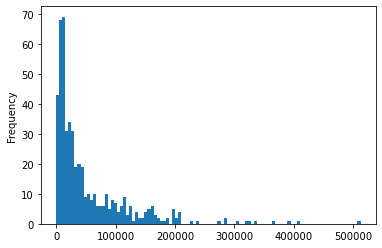

In [23]:
surface_pkg = data.PropertyGFAParking
# on vire les construction sans parking
no_parking = surface_pkg == 0
print('property without parking :', surface_pkg[no_parking].shape[0])
print('property with parking :', surface_pkg[~no_parking].shape[0])

surface_pkg = surface_pkg[~no_parking]

#nbf_counts = surface_pkg.value_counts()
#display(nbf_counts)
surface_pkg.plot.hist(bins=100)
display(surface_pkg.sort_values(ascending=False))

#### Surfaces intérieures (`PropertyGFABuilding(s)`)

property without building : 0
property with building : 3376


id
49967    9320156
22062    2200000
828      1765970
775      1632820
659      1592914
          ...   
50198      11685
592        11440
50204      11285
19928      10925
20885       3636
Name: PropertyGFABuilding(s), Length: 3376, dtype: int64

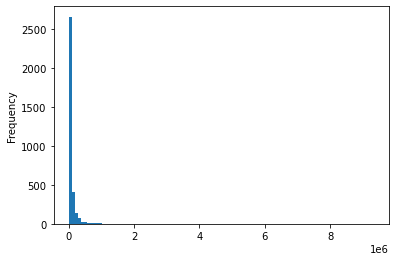

In [24]:
surface_bdg = data['PropertyGFABuilding(s)']
# on vire les constructions sans parking
no_builing = surface_bdg == 0
print('property without building :', surface_bdg[no_builing].shape[0])
print('property with building :', surface_bdg[~no_builing].shape[0])

surface_bdg = surface_bdg[~no_builing]

#nbf_counts = surface_pkg.value_counts()
#display(nbf_counts)
surface_bdg.plot.hist(bins=100)
display(surface_bdg.sort_values(ascending=False))

#### Relation entre les deux..

.. et implication sur la nature des immeubles et leur classification.


13/09 - je n'ai pas pris les bonnes classes : démarrer avec BuildingType

D'abord la proportion respective building / parking

Un scatter (relplot)

Puis on prend en considération la conso d'énergie dans chacun des 3 types et au total

Les classes (hue) sont d'abord les types de destinations (usages) --> multifacet

In [25]:
cols = [
    'PrimaryPropertyType', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
    'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'
]

new_cols = ['type', 'area_pkg', 'area_bdg', 'btu_total', 'btu_steam', 'btu_elec', 'btu_gas']
_data = data[cols]
_data.columns = new_cols

display(_data)

,type,area_pkg,area_bdg,btu_total,btu_steam,btu_elec,btu_gas
id,,,,,,,
1,Hotel,0,88434,7.226362e+06,2003882.00,3.946027e+06,1.276453e+06
2,Hotel,15064,88502,8.387933e+06,0.00,3.242851e+06,5.145082e+06
3,Hotel,196718,759392,7.258702e+07,21566554.00,4.952666e+07,1.493800e+06
5,Hotel,0,61320,6.794584e+06,2214446.25,2.768924e+06,1.811213e+06
8,Hotel,62000,113580,1.417261e+07,0.00,5.368607e+06,8.803998e+06
...,...,...,...,...,...,...,...
50222,Office,0,12294,8.497457e+05,0.00,5.242709e+05,3.254750e+05
50223,Other,0,16000,9.502762e+05,0.00,3.965461e+05,5.537300e+05
50224,Other,0,13157,5.765898e+06,0.00,1.792159e+06,3.973739e+06


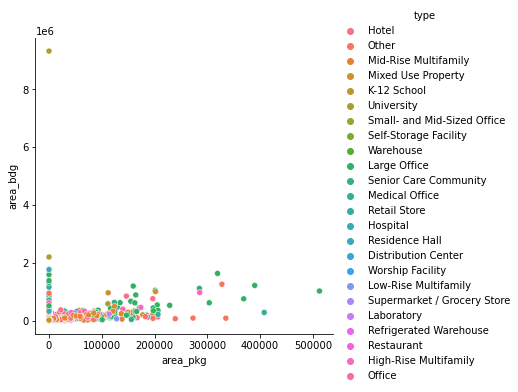

In [26]:
import seaborn as sns

sns.relplot(data=_data, x='area_pkg', y='area_bdg', hue='type')

## Score ENERGYSTAR

Attention, seul 75 % des bâtiments disposent d'un score ENERGYSTAR (en la variable `'ENERGYSTARScore'`).

La variable `'YearsENERGYSTARCertified'` est peu pertinente, puisqu'elle n'est renseignée que pour 3,5 % de bâtiments.

Elle se présente sous la forme d'une liste numérique d'années en format AAAA directement juxatposées (contigües sans séparateur). Nous l'analysons rapidement ci-après, mais le traitement de cette colonne va consister à la supprimer. 

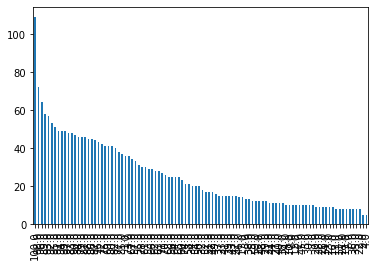

In [27]:
_ = cats_freqs(data, 'ENERGYSTARScore')

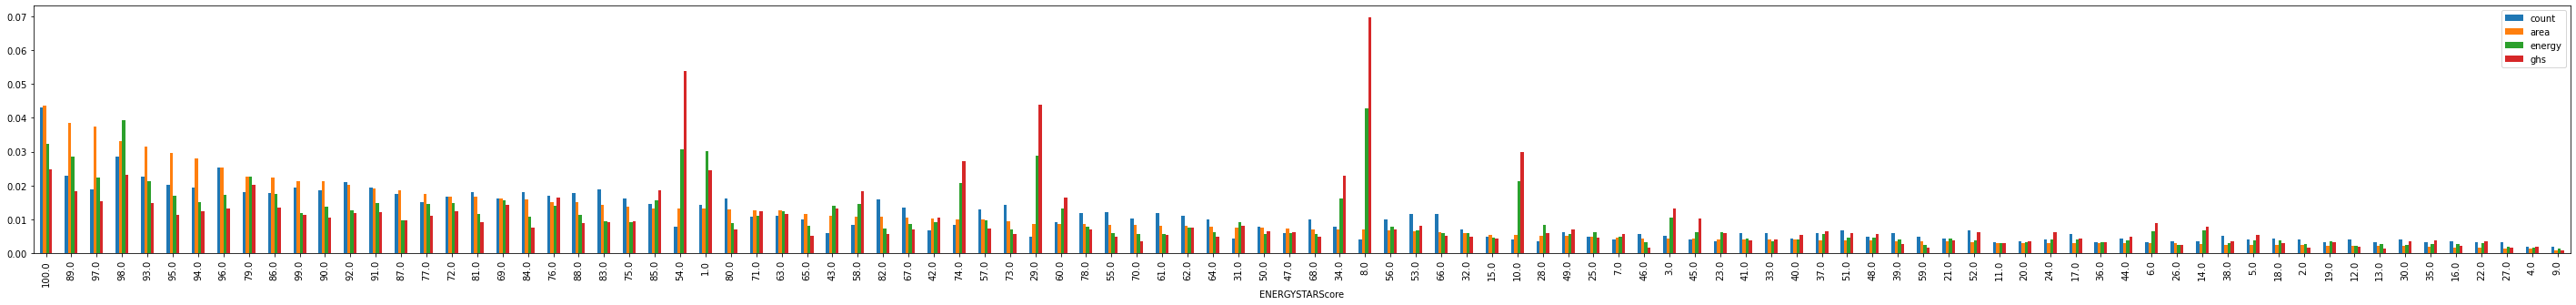

In [ ]:
_ = cats_weighted_freqs(data, 'ENERGYSTARScore',
        ['PropertyGFATotal', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions'],
        ['area', 'energy', 'ghs']
    )

<AxesSubplot:ylabel='Frequency'>

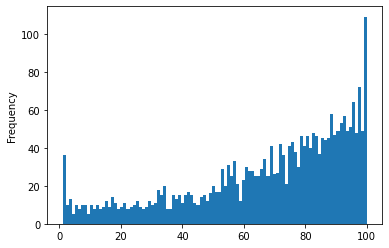

In [28]:
data.ENERGYSTARScore.plot.hist(bins=100)

# Analyse bivariée, feature engineering

Vérifications de cohérence fondées sur l'hypothèse d'existence d'une relation linéaire, sans constante additive, entre deux ou trois variables : $y = ax$ ou $z = ax + by$, avec $a, b$ constants.

**NB** > les études menées dans ce notebook montrent, s'ils fallait encore s'en convaincre, la supériorité de la médiane  sur la moyenne en tant que détecteur de tendance centrale. Sa puissance tient tout entière dans sa résistance aux outliers.

## Chargements librairies, dataset

In [29]:
from pepper_commons import *
from pepper_bivar import assert_relation, exclude_aberrants, assert_const_ratio
from pepper_production import *
from seattle_commons import clean_dataset
from seattle_commons import ratio_histo
from seattle_commons import display_outliers, display_aberrants

Data source : https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy

In [30]:
data = get_data()
_data, not_compliant, outliers = clean_dataset(data)

## ✔ Gaz (kBtu vs therms)

Etude du rapport entre :
* `'NaturalGas(kBtu)'`
* `'NaturalGas(therms)'`

Bilan :
* Rapport parfait : $G_{kBtu} = 100 G_{therms}$ ($\sigma=0$)
* Exclusion de 4 (NaN, NaN) [1768, 2321, 2480, 3348].
* Pas d'outlier.

# excluded : 4
# confirmed : 3207
consistancy : all is consistant!
median ratio : 1.0
mean ratio : 1.0
ratio std dev : 0.0
ratio kurtosis : 434.332
ratio skew : 6.531


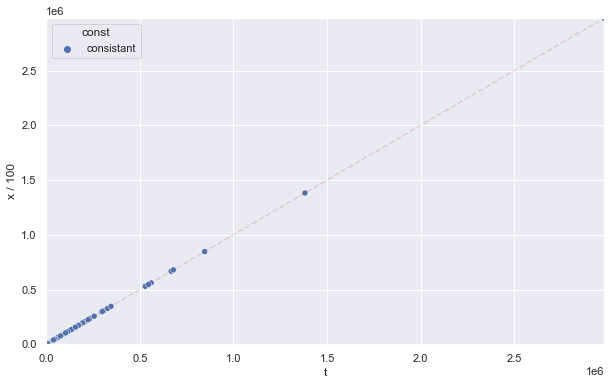

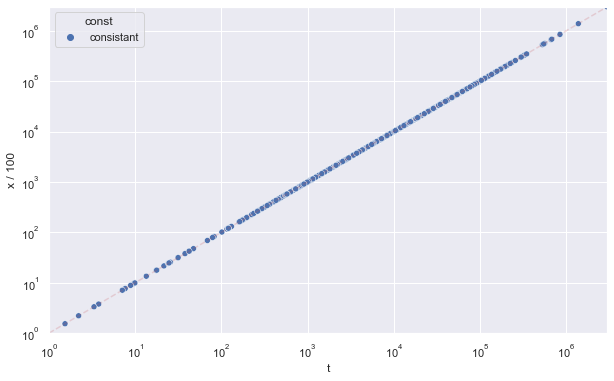

In [31]:
ok, ko, re, ab = assert_relation(
    data=_data,
    features=['NaturalGas(kBtu)'],
    target='NaturalGas(therms)',
    relation='x / 100'
)

In [32]:
display(ab)

,x,t,x / 100
id,,,
23355,NaN,NaN,NaN
25431,NaN,NaN,NaN
25763,NaN,NaN,NaN
50082,NaN,NaN,NaN


## ✔ Electricité (kBtu vs. kWh)

Etude du rapport entre :
* `'Electricity(kWh)'`
* `'Electricity(kBtu)'`

Bilan :
* Rapport presque parfait : $E_{kBtu} = 3.412 E_{kWh}$ ($\sigma=0.007$)
* Exclusion de 4 (NaN, NaN), les mêmes que pour le gaz [1768, 2321, 2480, 3348].
* 1 outlier expliqué par l'erreur de troncature [1670]

# excluded : 4
# confirmed : 3207
# inconsistancies (ε = 1 / 1000) : 1 (0.031 %)
median ratio : 3.412
mean ratio : 3.412
ratio std dev : 0.007
ratio kurtosis : 3203.999
ratio skew : -56.604


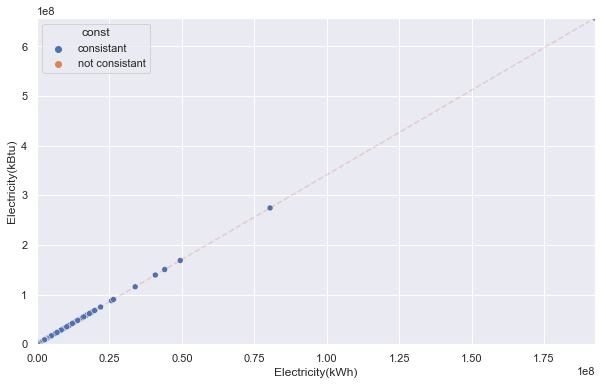

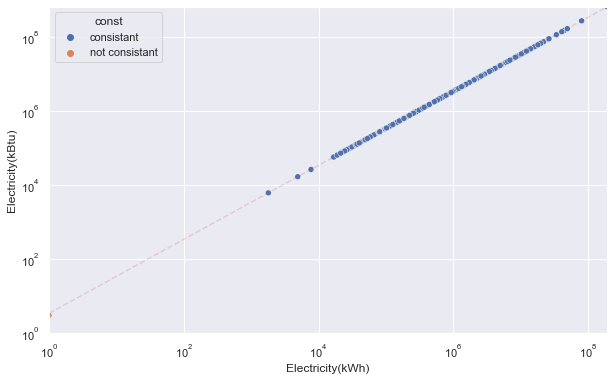

In [33]:
re, ab = exclude_aberrants(_data, ['Electricity(kWh)', 'Electricity(kBtu)'])
ok, ko = assert_const_ratio(re, 'Electricity(kWh)', 'Electricity(kBtu)')

#### Outliers

Les aberrants ne sont pas aberrants. Ce sont 3 bâtiments qui semblent ne pas consommer d'électricité, ce qui semble indiquer qu'ils la produisent de manière autonome.

Le premier, Pier 57 ne consommerait que du gaz (100 % de son mix).

Pour les deux autres, IUC- Whole Foods Interbay et Minor Tower Apartments, c'est plus délicat :

1. la ventilation indique 0 pour chacune des 3 sources principales d'énergie,
2. la consommation site n'est pas nulle,
3. la consommation source est nulle.

https://www.apartments.com/2525-minor-ave-e-seattle-wa-unit-207/l8fcfwe/ : *Electricity (Seattle City Light) - Resident responsibility*

https://foursquare.com/v/whole-foods-market/4ad90bfff964a5207f1721e3

La conclusion pour Minor Tower Apartments, c'est que l'énergie consommée par le site est calculée sur la base de la consommation des résidents, mais que le site et son propriétaire n'ont pas de contrat direct avec la ville.

Pour Whole Foods Interbay, pas de conclusion à ce stade.


In [34]:
display(ab)
display(data.loc[ab.index])
display(data[data.columns[29:40]].loc[ab.index])

,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
23355,Multifamily LR (1-4),Low-Rise Multifamily,GRAHAM VIEW,6040 CALIFORNIA AVE SW,98136.0,7625703280,1,SOUTHWEST,47.54731,-122.38656,...,NaN,5.636832e+05,5.937986e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25431,Multifamily LR (1-4),Low-Rise Multifamily,PONDERAY APTS,5625 15TH AVE NE,98105.0,5226300030,4,NORTHEAST,47.67025,-122.31232,...,NaN,7.702755e+05,7.975070e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25763,Multifamily LR (1-4),Low-Rise Multifamily,Villa Andora,1520 CALIFORNIA AVE SW,98116.0,9272201340,1,SOUTHWEST,47.58968,-122.38587,...,NaN,1.049639e+06,1.126782e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50082,Multifamily LR (1-4),Low-Rise Multifamily,STREAM FIFTEEN,605 15TH AVE E,98112.0,3303700030,3,EAST,47.62441,-122.31300,...,NaN,8.202201e+05,8.576127e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
23355,2016,Multifamily LR (1-4),Low-Rise Multifamily,GRAHAM VIEW,6040 CALIFORNIA AVE SW,Seattle,WA,98136.0,7625703280,1,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,NaN,NaN,NaN
25431,2016,Multifamily LR (1-4),Low-Rise Multifamily,PONDERAY APTS,5625 15TH AVE NE,Seattle,WA,98105.0,5226300030,4,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,NaN,NaN,NaN
25763,2016,Multifamily LR (1-4),Low-Rise Multifamily,Villa Andora,1520 CALIFORNIA AVE SW,Seattle,WA,98116.0,9272201340,1,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,NaN,NaN,NaN
50082,2016,Multifamily LR (1-4),Low-Rise Multifamily,STREAM FIFTEEN,605 15TH AVE E,Seattle,WA,98112.0,3303700030,3,...,NaN,NaN,NaN,NaN,False,NaN,Compliant,NaN,NaN,NaN


,SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData
id,,,,,,,,,,,
23355,20.200001,NaN,NaN,5.636832e+05,5.937986e+05,NaN,NaN,NaN,NaN,NaN,False
25431,28.000000,NaN,NaN,7.702755e+05,7.975070e+05,NaN,NaN,NaN,NaN,NaN,False
25763,37.000000,NaN,NaN,1.049639e+06,1.126782e+06,NaN,NaN,NaN,NaN,NaN,False
50082,31.500000,NaN,NaN,8.202201e+05,8.576127e+05,NaN,NaN,NaN,NaN,NaN,False


L'outlier est l'[Evergreen Washelli Memorial Park](https://en.wikipedia.org/wiki/Evergreen_Washelli_Memorial_Park).

C'est le plus grand cimetière de Seattle, 58 ha (144 acres).

La divergence d'avec la norme vient de l'erreur de troncature (arrondi à l'entier le plus proche) cf. couple $x, y* proche de l'unité. En effet, le cimetière est champion en termes de non consommation d'énergie rapportée à sa surface. Il semble représenter la meilleure solution face au problème du réchauffement climatique.

In [35]:
display(ko)
display(data.loc[ko.index])
display(data[data.columns[29:40]].loc[ko.index])

,Electricity(kWh),Electricity(kBtu),ratio
id,,,
23064,1.0,3.0,3.0


,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
23064,2016,NonResidential,Other,Evergreen Washelli,11111 Aurora Ave. N,Seattle,WA,98133.0,3026049008,5,...,1.0,3.0,34758.00781,3475801.0,False,NaN,Compliant,NaN,184.6,7.97


,SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData
id,,,,,,,,,,,
23064,157.5,157.5,165.399994,3475804.25,3648465.5,0.0,1.0,3.0,34758.00781,3475801.0,False


## WN (Weather Normalized)

Etude du rapport entre :
* `'SiteEnergyUse(kBtu)'`
* `'SiteEnergyUseWN(kBtu)'`

Bilan :
* Rapport quasi constant : $E_{WN} = 1.052 E$ ($\sigma=0.075$)
* Exclusion d'un unique $E_{WN}$ à NaN.
* 13 outliers de deux natures :
    - 2 dont le rapport s'établit à 0.7 (-30 %) [98, 3206] : un hôpital et le Bullit Center, le bâtiment le + vert du monde.
    - 11 dont $E_{WN} = 0$ [220, 247, 284, 350, 882, 953, 3274, 3275, 3277, 3302, 3323]

Traitements :
* Passer les 11 $E_{WN}$ de 0 à NaN : la valeur 0 est n'a pas de sens.
* Définir deux classes à traduire numériquement de la manière la plus pertinente : les 1.052, les 0.7

# excluded : 1
# confirmed : 3210
# inconsistancies (ε = 1 / 1000) : 13 (0.405 %)
median ratio : 1.052
mean ratio : 1.052
ratio std dev : 0.075
ratio kurtosis : 129.449
ratio skew : -9.277


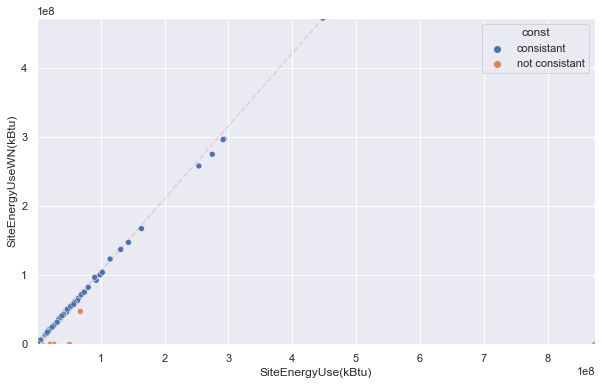

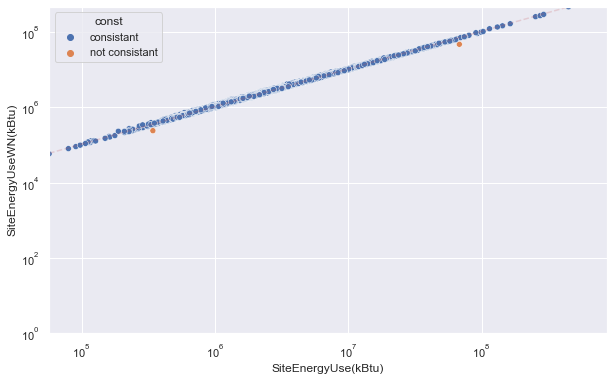

In [36]:
re, ab = exclude_aberrants(_data, ['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)'])
ok, ko = assert_const_ratio(re, 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', err=.2)

In [37]:
display(ab)

,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,...,SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
757,NonResidential,Large Office,Market Place I & II-2003 Western Avenue,2003 Western Avenue,98121.0,1977200280,7,DOWNTOWN,47.61051,-122.34439,...,0.0,5177270.5,NaN,0.0,1427645.25,4871126.0,14160.40918,1416041.0,109.16,0.83


In [38]:
display(ko)
display(data.loc[ko.index])
display(data[data.columns[29:40]].loc[ko.index])
# TODO : faire plus compact pour plus lisible : 1 seul tableu, pas 3, et séparer les deux types d'outliers

,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),ratio
id,,,
147,6.809073e+07,4.760272e+07,0.699107
343,2.490613e+07,0.000000e+00,0.000000
372,2.682322e+07,0.000000e+00,0.000000
414,5.446624e+06,0.000000e+00,0.000000
493,3.484916e+06,0.000000e+00,0.000000
20130,4.964773e+05,0.000000e+00,0.000000
20324,1.128179e+06,0.000000e+00,0.000000
49784,3.427261e+05,2.401321e+05,0.700653
49967,8.739237e+08,0.000000e+00,0.000000


,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
id,,,,,,,,,,,,,,,,,,,,,
147,2016,NonResidential,Hospital,Swedish Ballard,5300 Tallman Ave NW,Seattle,WA,98107.0,2767703875,6,...,1.032743e+07,35237205.0,328535.125000,32853512.0,False,NaN,Compliant,NaN,1990.50,6.98
343,2016,NonResidential,Large Office,Norton Building,801 2nd Ave Suite 1300,Seattle,WA,98104.0,0939000355,7,...,4.098788e+06,13985064.0,0.000000,0.0,False,NaN,Compliant,NaN,940.47,2.48
372,2016,NonResidential,Large Office,Metropolitan Park East,1730 Minor Avenue,Seattle,WA,98101.0,0660002410,7,...,7.796691e+06,26602310.0,2209.050049,220905.0,False,NaN,Compliant,NaN,197.19,0.40
414,2016,NonResidential,Large Office,Onni 1411 Fourth Development LP,1411 4TH AVE,Seattle,WA,98101.0,1975700345,7,...,7.610041e+05,2596546.0,0.000000,0.0,False,NaN,Compliant,NaN,238.09,1.58
493,2016,NonResidential,Small- and Mid-Sized Office,200 First Ave W,200 1ST AVE W,Seattle,WA,98119.0,1989201020,7,...,1.021370e+06,3484915.0,0.000000,0.0,False,NaN,Compliant,NaN,24.29,0.28
20130,2016,NonResidential,Worship Facility,Green Lake United Methodist Church,6415 1st ave ne,Seattle,WA,98115.0,1257200735,6,...,4.896690e+04,167075.0,3294.021729,329402.0,False,NaN,Compliant,NaN,18.66,0.78
20324,2016,NonResidential,Worship Facility,Temple Beth Am,2632 NE 80th St.,Seattle,WA,98115.0,1513800009,4,...,2.082293e+05,710478.0,4177.007813,417701.0,False,NaN,Compliant,NaN,27.14,0.86
49784,2016,NonResidential,Small- and Mid-Sized Office,Bullitt Center,1501 E. Madison St.,Seattle,WA,98122.0,7234600195,3,...,-3.382680e+04,-115417.0,0.000000,0.0,False,NaN,Compliant,NaN,-0.80,-0.02
49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,...,1.925775e+08,657074389.0,0.000000,0.0,False,NaN,Compliant,NaN,11140.56,1.20


,SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData
id,,,,,,,,,,,
147,157.300003,479.500000,251.800003,6.809073e+07,4.760272e+07,0.00,1.032743e+07,35237205.0,328535.125000,32853512.0,False
343,0.000000,240.899994,0.000000,2.490613e+07,0.000000e+00,10921066.00,4.098788e+06,13985064.0,0.000000,0.0,False
372,0.000000,227.899994,0.000000,2.682322e+07,0.000000e+00,0.00,7.796691e+06,26602310.0,2209.050049,220905.0,False
414,0.000000,92.300003,0.000000,5.446624e+06,0.000000e+00,2850077.75,7.610041e+05,2596546.0,0.000000,0.0,False
493,0.000000,157.000000,0.000000,3.484916e+06,0.000000e+00,0.00,1.021370e+06,3484915.0,0.000000,0.0,False
20130,0.000000,36.400002,0.000000,4.964773e+05,0.000000e+00,0.00,4.896690e+04,167075.0,3294.021729,329402.0,False
20324,0.000000,89.000000,0.000000,1.128179e+06,0.000000e+00,0.00,2.082293e+05,710478.0,4177.007813,417701.0,False
49784,5.000000,2.000000,-2.100000,3.427261e+05,2.401321e+05,0.00,-3.382680e+04,-115417.0,0.000000,0.0,False
49967,0.000000,246.600006,0.000000,8.739237e+08,0.000000e+00,84985240.00,1.925775e+08,657074389.0,0.000000,0.0,False


median : 1.051751929993408
mean : 1.0515726340374618
modes : 0    1.0
Name: ratio, dtype: float64


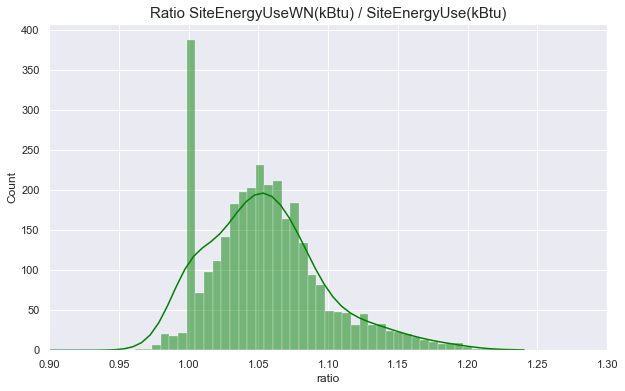

In [39]:
sns.histplot(data=ok, x='ratio', kde=True, bins=200, color='green')
plt.title('Ratio SiteEnergyUseWN(kBtu) / SiteEnergyUse(kBtu)', size=15)
#sns.histplot(data=inconst, x='ratio', kde=True, bins=200)
plt.xlim(0.9, 1.3)

print('median :', ok.ratio.median())
print('mean :', ok.ratio.mean())
print('modes :', ok.ratio.mode())  # c'est le mode qui nous indique les pics

## Site vs. Source

`'SourceEUI(kBtu/sf)'` l'**intensité de la consommation d'énergie** (EUI) est la consommation d'énergie source d'une propriété divisée par sa surface de plancher brute. La consommation d'énergie source est l'énergie annuelle utilisée pour exploiter la propriété, y compris les pertes de production, de transmission et de distribution. L'EUI source est mesurée dans des milliers d'unités thermiques britanniques (KBTU) par pied carré.

`'SiteEUI(kBtu/sf)'` l'**intensité de la consommation d'énergie du site** (EUI) est la consommation d'énergie du site d'une propriété divisée par sa surface de plancher brute. La consommation d'énergie du site est le montant annuel de toute l'énergie consommée par la propriété sur place, comme indiqué sur les factures de services publics. Le site EUI est mesuré en milliers d'unités thermiques britanniques (KBTU) par pied carré.

Etude du rapport entre :
* `'SourceEUI(kBtu/sf)'`
* `'SiteEUI(kBtu/sf)'`

Bilan :
* Rapport non constant :
    - un pic (mode) sur un rapport maximum (sauf outliers) $E_{Source} = 3.14 E_{Site}$
    - des rapports qui se distribuent ensuite entre 1 et ce maximum
    - **nb** > un ratio < 1 est aberrant a priori (les pertes sur le réseau ne peuvent être négatives).
* Exclusion de 4 en (NaN, NaN) [1768, 2321, 2480, 3348].
* Outliers hors l'intervalle 1, 3.14 :
    - 6 individus aberrants dont la valeur source est nulle [505, 513, 755, 1323, 1883, 2791]
    - 1 low outlier avec un rapport à peine supérieur à 1 (1.05) [426] (Proche de la centrale ?)
    - 2 low outliers dont les rapports sont 0.28 et 0.41, ce qui est a priori impossible [3206, 2761]
    - 3 high outliers dont les rapports sont 4.66, 5.16 et 13.72 [46, 3350, 529]

Théorie : le rapport exprime le coût réel de production de l'énergie consommée, en prenant en compte les pertes de l'opérateur sur son réseau de distribution. On peut pousser l'hypothèse - qui pourrait être vérifiée - à une déperdition qui dépend de la distance à la centrale de production. Cependant, cette dernière hypothèse est molle face à un maximum constant où se concentre la plus grande partie des individus.

# excluded : 4
# confirmed : 3207
# inconsistancies (ε = 1 / 1000) : 2985 (93.078 %)
median ratio : 2.674
mean ratio : 2.583
ratio std dev : 0.615
ratio kurtosis : 32.99
ratio skew : 1.263


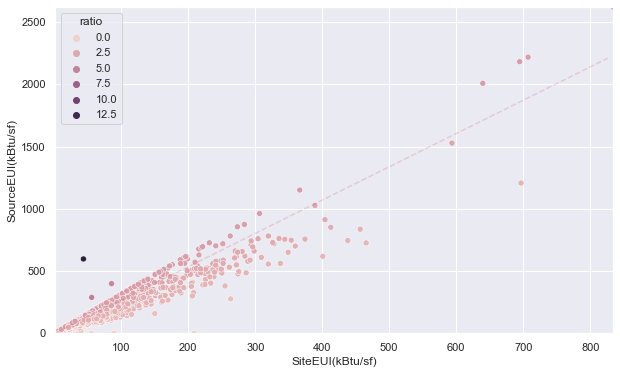

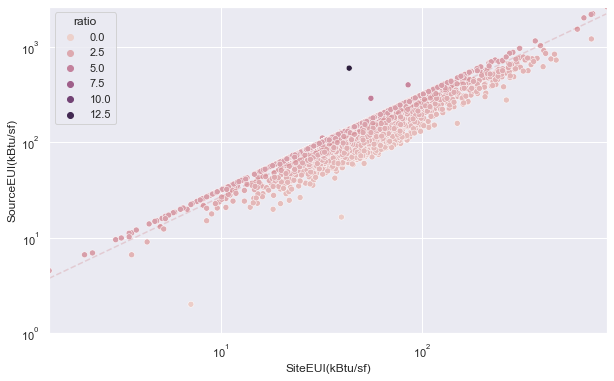

In [40]:
re, ab = exclude_aberrants(_data, ['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)'])
ok, ko = assert_const_ratio(re, 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)')

Le nuage de point ne montre pas une forme linéaire bien définie.

Il forme plutôt un cône délimité par deux pentes limites.

La droite de pente la plus forte semble concentrer un nombre significatifs de points.

Aberrants :

In [41]:
# TODO : Nice-to-have (finitions) : fonction générique, tout ce qui suit réduit à une seule ligne
compared_cols = [_data.columns[28], _data.columns[26]]
compared_family_other_cols = [_data.columns[29]] + [_data.columns[27]] + list(_data.columns[30:37])
family_name = 'Energy data'
display_aberrants(_data, ab, compared_cols, compared_family_other_cols, family_name)

Identification                                        \
                         id                b_type          p_type   
id                                                                  
23355  Multifamily LR (1-4)  Low-Rise Multifamily     GRAHAM VIEW   
25431  Multifamily LR (1-4)  Low-Rise Multifamily   PONDERAY APTS   
25763  Multifamily LR (1-4)  Low-Rise Multifamily    Villa Andora   
50082  Multifamily LR (1-4)  Low-Rise Multifamily  STREAM FIFTEEN   

                     Ratio                            Energy data  \
      SourceEUIWN(kBtu/sf) SiteEUIWN(kBtu/sf) SiteEnergyUse(kBtu)   
id                                                                  
23355                  NaN          20.200001        5.636832e+05   
25431                  NaN          28.000000        7.702755e+05   
25763                  NaN          37.000000        1.049639e+06   
50082                  NaN          31.500000        8.202201e+05   

                                                               \
      SourceEUI(kBtu/sf) SiteEnergyUseWN(kBtu) SteamUse(kBtu)   
id                                                              
23355                NaN          5.937986e+05            NaN   
25431                NaN          7.975070e+05            NaN   
25763                NaN          1.126782e+06            NaN   
50082                NaN          8.576127e+05            NaN   

                                                                              \
      Electricity(kWh) Electricity(kBtu) NaturalGas(therms) NaturalGas(kBtu)   
id                                                                             
23355              NaN               NaN                NaN              NaN   
25431              NaN               NaN                NaN              NaN   
25763              NaN               NaN                NaN              NaN   
50082              NaN               NaN                NaN              NaN   

                         
      TotalGHGEmissions  
id                       
23355               NaN  
25431               NaN  
25763               NaN  
50082               NaN

Outliers :

In [42]:
# TODO : Nice-to-have (finitions) : fonction générique, tout ce qui suit réduit à une seule ligne
compared_cols = [_data.columns[28], _data.columns[26]]
compared_family_other_cols = [_data.columns[29]] + [_data.columns[27]] + list(_data.columns[30:37])
family_name = 'Energy data'
display_outliers(_data, ko, compared_cols, compared_family_other_cols, family_name)

Identification                               \
                         id                       b_type   
id                                                         
716          NonResidential                 Retail Store   
50086  Multifamily LR (1-4)         Low-Rise Multifamily   
59           NonResidential  Small- and Mid-Sized Office   
20868        NonResidential                 Large Office   
757          NonResidential                 Large Office   
...                     ...                          ...   
26973        NonResidential           Mixed Use Property   
700          NonResidential  Supermarket / Grocery Store   
688    Multifamily MR (5-9)         Mid-Rise Multifamily   
23682  Multifamily LR (1-4)        Senior Care Community   
19793  Multifamily MR (5-9)         Mid-Rise Multifamily   

                                                    Ratio  \
                                        p_type      ratio   
id                                                          
716                           Western Building  13.719540   
50086                           Interbay Place   5.163083   
59                             Gibraltar Tower   4.668618   
20868                                 Stone 34   3.456250   
757    Market Place I & II-2003 Western Avenue   3.240506   
...                                        ...        ...   
26973                              New Central   0.000000   
700                  IUC- Whole Foods Interbay   0.000000   
688                        ID Village Square 2   0.000000   
23682           BRIDGE PARK HOLIDAY RETIREMENT   0.000000   
19793                     Union Bay Apartments   0.000000   

                                                      Energy data  \
      SourceEUIWN(kBtu/sf) SiteEUIWN(kBtu/sf) SiteEnergyUse(kBtu)   
id                                                                  
716             594.500000          45.000000          3241917.00   
50086           315.899994          60.700001          2751301.25   
59              412.200012          88.300003          5071974.00   
20868           108.400002          40.799999          4489661.00   
757               0.000000                NaN          5177270.50   
...                    ...                ...                 ...   
26973             0.000000          90.900002          4729846.50   
700               0.000000         214.100006         12525174.00   
688               0.000000          58.500000          5974993.50   
23682             0.000000          36.900002          5121586.00   
19793             0.000000          38.900002          2321336.00   

                                                               \
      SourceEUI(kBtu/sf) SiteEnergyUseWN(kBtu) SteamUse(kBtu)   
id                                                              
716           596.799988             3350477.0            0.0   
50086         288.100006             2992911.0            0.0   
59            398.700012             5242479.5            0.0   
20868         110.599998             4515744.5            0.0   
757           128.000000                   NaN            0.0   
...                  ...                   ...            ...   
26973           0.000000             4821852.0            0.0   
700             0.000000            12843856.0            0.0   
688             0.000000             6284895.5            0.0   
23682           0.000000             5333731.0            0.0   
19793           0.000000             2436266.5            0.0   

                                                                              \
      Electricity(kWh) Electricity(kBtu) NaturalGas(therms) NaturalGas(kBtu)   
id                                                                             
716       6.553044e+05         2235899.0       10060.180660        1006018.0   
50086     1.326488e+06         4525978.0           0.000000              0.0   
59        1.486510e+06         5071973.

Intéressons-nous à la distribution fréquentielle des pentes.

On trouve une confirmation d'une ligne dense de points sur la pente ~3.14

count   : 3207
median  : 2.673972560821918
mean    : 2.5834591320382447
modes   : [3.142857142857143]
std     : 0.6148424625599092
kurt    : 32.98968168437907


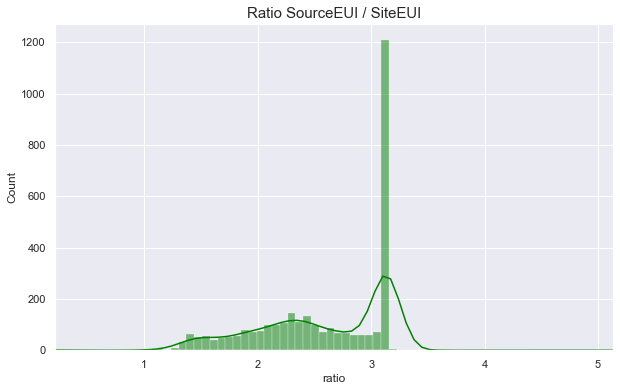

In [43]:
ratio_histo(ok.ratio, 'SourceEUI', 'SiteEUI')

Individus sur la pente principale (1/3), dont on raffine la pente au passage.

La pente s'établit à 3.1398

count   : 1180
median  : 3.1398009039528434
mean    : 3.1396993616232107
modes   : [3.142857142857143]
std     : 0.004679081434464869
kurt    : 8.55524650178334


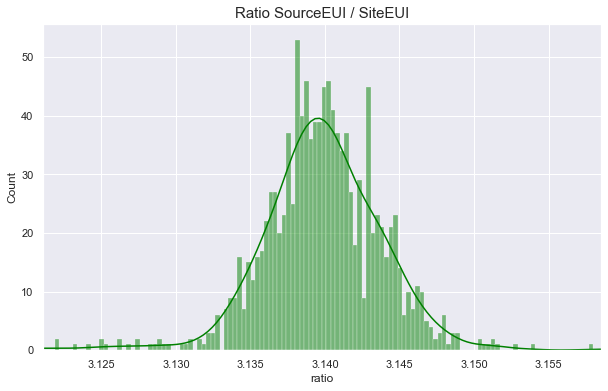

In [44]:
main_slope = ok.ratio.mode()[0]   # 3.14..
main_ratio = ok[(ok.ratio / main_slope - 1).abs() < .01].ratio
ratio_histo(main_ratio, 'SourceEUI', 'SiteEUI')

Et les autres (2/3) :

count   : 2027
median  : 2.2919464695261516
mean    : 2.2596488355852267
modes   : [0.0]
std     : 0.559539618672871
kurt    : 86.72677678153067


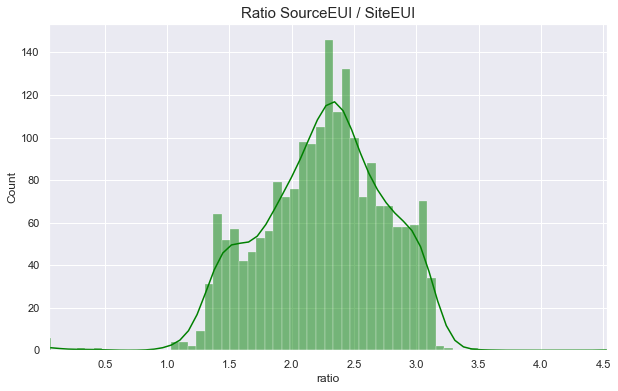

In [45]:
rest_ratio = ok.drop(index=main_ratio.index).ratio
ratio_histo(rest_ratio, 'SourceEUI', 'SiteEUI')

Matérialisation de classes + d'une feature, le gain par rapport au ratio max.

,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),ratio,const
id,,,,
1,81.699997,182.500000,2.233782,not consistant
2,94.800003,176.100006,1.857595,not consistant
3,96.000000,241.899994,2.519792,not consistant
5,110.800003,216.199997,1.951263,not consistant
8,114.800003,211.399994,1.841463,not consistant
...,...,...,...,...
50221,51.000000,126.000000,2.470588,not consistant
50223,59.400002,114.199997,1.922559,not consistant
50224,438.200012,744.799988,1.699680,not consistant


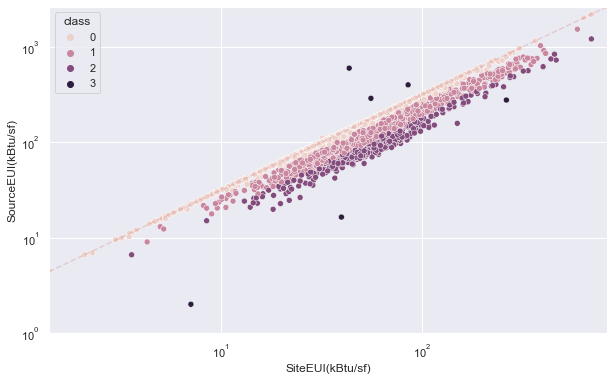

In [46]:
import numpy as np

display(ok)

def classify(r):
    if abs(r / 3.142857 - 1) < .15:
        return 0
    elif abs(r / 2.3 - 1) < .2:
        return 1
    elif abs(r / 1.5 - 1) < .3:  # c'est ballot avec cela j'inclus en classe 3 des individus entre 1.2 et 1.25
        return 2
    else:
        return 3

ok['class'] = ok.ratio.apply(classify)
x = ok['SiteEUI(kBtu/sf)']
y = ok['SourceEUI(kBtu/sf)']
xlim = (x.min(), x.max())
ylim = (y.min(), y.max())
ax = sns.scatterplot(data=ok, x='SiteEUI(kBtu/sf)', y='SourceEUI(kBtu/sf)', hue='class')	
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.xlim(max(1, xlim[0]), xlim[1])
plt.ylim(max(1, ylim[0]), ylim[1])
xlen = xlim[1] - xlim[0]
ylen = ylim[1] - ylim[0]
x = np.arange(max(1, xlim[0]), xlim[1], xlen / 100)
y = x * 3.142857
ax.plot(x, y, 'r--', alpha=.2)
plt.xscale('log', base=10)
plt.yscale('log', base=10)
plt.show()


Qui sont les outliers (classe 3) ?

In [47]:
# TODO : Nice-to-have (finitions) : fonction générique, tout ce qui suit réduit à une seule ligne
compared_cols = [_data.columns[28], _data.columns[26]]
compared_family_other_cols = [_data.columns[29]] + [_data.columns[27]] + list(_data.columns[30:37])
family_name = 'Energy data'
outliers = ok[ok['class'] == 3].dropna()
display_outliers(_data, outliers, compared_cols, compared_family_other_cols, family_name)

Identification                               \
                         id                       b_type   
id                                                         
716          NonResidential                 Retail Store   
50086  Multifamily LR (1-4)         Low-Rise Multifamily   
59           NonResidential  Small- and Mid-Sized Office   
23854        NonResidential                   Restaurant   
26849        NonResidential                 Retail Store   
49784        NonResidential  Small- and Mid-Sized Office   
688    Multifamily MR (5-9)         Mid-Rise Multifamily   
700          NonResidential  Supermarket / Grocery Store   
19793  Multifamily MR (5-9)         Mid-Rise Multifamily   
21524  Multifamily LR (1-4)         Low-Rise Multifamily   
23682  Multifamily LR (1-4)        Senior Care Community   
26973        NonResidential           Mixed Use Property   

                                           Ratio                       \
                               p_type      ratio SourceEUIWN(kBtu/sf)   
id                                                                      
716                  Western Building  13.719540           594.500000   
50086                  Interbay Place   5.163083           315.899994   
59                    Gibraltar Tower   4.668618           412.200012   
23854                         Pier 57   1.049772           284.600006   
26849                      C & T BLDG   0.412060            17.700001   
49784                  Bullitt Center   0.281690            -2.100000   
688               ID Village Square 2   0.000000             0.000000   
700         IUC- Whole Foods Interbay   0.000000             0.000000   
19793            Union Bay Apartments   0.000000             0.000000   
21524          Minor Tower Apartments   0.000000             0.000000   
23682  BRIDGE PARK HOLIDAY RETIREMENT   0.000000             0.000000   
26973                     New Central   0.000000             0.000000   

                                 Energy data                     \
      SiteEUIWN(kBtu/sf) SiteEnergyUse(kBtu) SourceEUI(kBtu/sf)   
id                                                                
716            45.000000        3.241917e+06         596.799988   
50086          60.700001        2.751301e+06         288.100006   
59             88.300003        5.071974e+06         398.700012   
23854         271.100006        1.150804e+07         276.299988   
26849          42.000000        9.772303e+05          16.400000   
49784           5.000000        3.427261e+05           2.000000   
688            58.500000        5.974994e+06           0.000000   
700           214.100006        1.252517e+07           0.000000   
19793          38.900002        2.321336e+06           0.000000   
21524          33.200001        8.801155e+05           0.000000   
23682          36.900002        5.121586e+06           0.000000   
26973          90.900002        4.729846e+06           0.000000   

                                                                               \
      SiteEnergyUseWN(kBtu) SteamUse(kBtu) Electricity(kWh) Electricity(kBtu)   
id                                                                              
716            3.350477e+06            0.0     6.553044e+05         2235899.0   
50086          2.992911e+06            0.0     1.326488e+06         4525978.0   
59             5.242480e+06            0.0     1.486510e+06         5071973.0   
23854          1.185445e+07            0.0     0.000000e+00               0.0   
26849          1.031448e+06            0.0     2.643640e+04           90201.0   
49784          2.401321e+05            0.0    -3.382680e+04         -115417.0   
688            6.284896e+06            0.0     5.764793e+05         1966947.0   
700            1.284386e+07            0.0     0.000000e+00               0.0   
19793          2.436266e+06            0.0     5.509018e+05         1879677.0   
21524          9.197677e+05           

## Surface totale / intérieure et extérieure

### ✔ Vérification de $x + y = z$
**Q** - *La surface totale est-elle bien la somme des surfaces de parking et de building(s) ?*

En notant $x, y, z$ les 3 variables `'PropertyGFAParking'`, `'PropertyGFABuilding(s)'`, `'PropertyGFATotal'`

On vérifie la perfection de la relation linéaire $x + y = z$.

Pas d'exclusion ni d'outlier.

Comme conséquence, l'une des 3 variables est superflue.

# excluded : 0
# confirmed : 3211
consistancy : all is consistant!
median ratio : 1.0
mean ratio : 1.0
ratio std dev : 0.0
ratio kurtosis : 0
ratio skew : 0


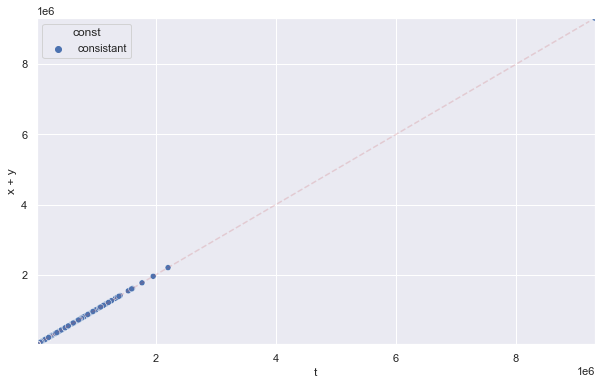

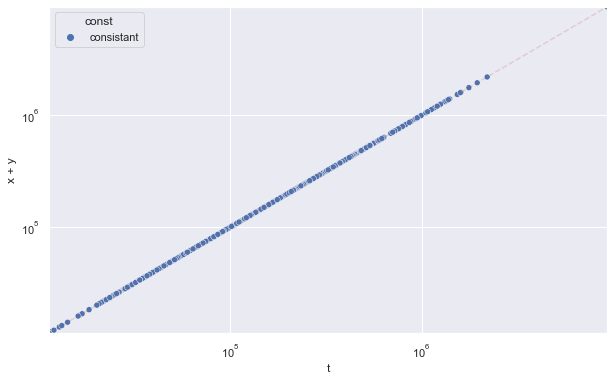

In [48]:
ok, ko, re, ab = assert_relation(
    data=_data,
    features=['PropertyGFAParking', 'PropertyGFABuilding(s)'],
    target='PropertyGFATotal',
    relation='x + y'
)

### Proportions relatives des deux surfaces

L'observation principale est qu'il y a une proportion majoritaire (85 %) d'immeubles purs (sans surface extérieure).

La seconde est que le profil type d'une propriété mixte est 25 % de surface extérieure pour 75 % d'intérieure.

,x,y,t,x + y,%x,%y
id,,,,,,
1,0,88434,88434,88434,0.000000,1.000000
2,15064,88502,103566,103566,0.145453,0.854547
3,196718,759392,956110,956110,0.205748,0.794252
5,0,61320,61320,61320,0.000000,1.000000
8,62000,113580,175580,175580,0.353115,0.646885
...,...,...,...,...,...,...
50221,0,18261,18261,18261,0.000000,1.000000
50223,0,16000,16000,16000,0.000000,1.000000
50224,0,13157,13157,13157,0.000000,1.000000


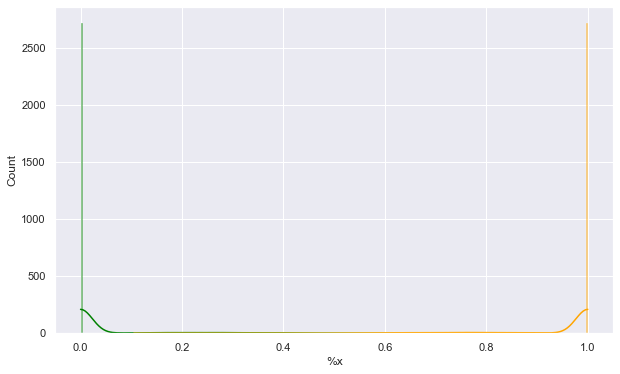

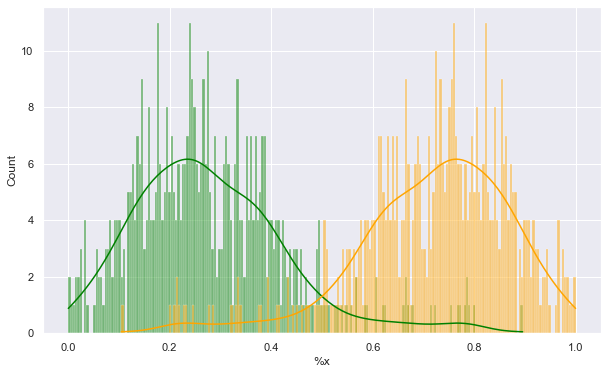

In [49]:
re = re.copy()
re[r'%x'] = re.x / re.t
re[r'%y'] = re.y / re.t
display(re)
#sns.scatterplot(data=area, x=r'%x', y=r'%y') #, hue='class')
sns.histplot(data=re, x=r'%x', kde=True, bins=200, color='green')
sns.histplot(data=re, x=r'%y', kde=True, bins=200, color='orange')
plt.show()
sns.histplot(data=re[re.x > 0], x=r'%x', kde=True, bins=200, color='green')
sns.histplot(data=re[re.x > 0], x=r'%y', kde=True, bins=200, color='orange')
plt.show()	

### Les buildings purs

Il représentent 85 % de la population.

In [50]:
display(re[re.x == 0])

,x,y,t,x + y,%x,%y
id,,,,,,
1,0,88434,88434,88434,0.0,1.0
5,0,61320,61320,61320,0.0,1.0
10,0,83008,83008,83008,0.0,1.0
11,0,102761,102761,102761,0.0,1.0
12,0,163984,163984,163984,0.0,1.0
...,...,...,...,...,...,...
50221,0,18261,18261,18261,0.0,1.0
50223,0,16000,16000,16000,0.0,1.0
50224,0,13157,13157,13157,0.0,1.0


### Les propriétés avec espace extérieur

La médiane de la part de surface totale consacrée aux espaces extérieurs (parkings) est de 25 % avec un écart type de 15 %.

In [51]:
a = re[re.x > 0].copy()
c, s, mn, md, st = a.count(), a.sum(), a.mean(), a.median(), a.std()
a.loc['count'] = c
a.loc['sum'] = s
a.loc['mean'] = mn
a.loc['median'] = md
a.loc['std'] = st
display(a)

,x,y,t,x + y,%x,%y
id,,,,,,
2,1.506400e+04,8.850200e+04,1.035660e+05,1.035660e+05,0.145453,0.854547
3,1.967180e+05,7.593920e+05,9.561100e+05,9.561100e+05,0.205748,0.794252
8,6.200000e+04,1.135800e+05,1.755800e+05,1.755800e+05,0.353115,0.646885
9,3.719800e+04,6.009000e+04,9.728800e+04,9.728800e+04,0.382349,0.617651
13,1.496000e+03,6.221600e+04,6.371200e+04,6.371200e+04,0.023481,0.976519
...,...,...,...,...,...,...
count,4.930000e+02,4.930000e+02,4.930000e+02,4.930000e+02,493.000000,493.000000
sum,2.685364e+07,6.889322e+07,9.574687e+07,9.574687e+07,137.526765,355.473235
mean,5.446987e+04,1.397428e+05,1.942127e+05,1.942127e+05,0.278959,0.721041


## Surface totale / sa ventilation par usage

**Q** - *La surface totale est-elle systématiquement la sommes des surfaces par usage ?*

**NB** - le cas du parking est spécial : il faut vérifier qu'il y a cohérence entre la surface indiquée dans `'PropertyGFAParking'` et celle indiquée dans l'éventuel des 3 usages ventilés ayant le label `'Parking'`.

Bilan :
* Pas d'exclusion
* 72 % d'individus vérifient la relation (erreur tolérée 1 pour 1000).
* 28 % ne la vérifient pas ... <mark>Analyse à poursuivre en réutilisant l'histogramme pentes</mark>
* Pour les 593 propriétés avec parking, les inconsistances dépassent les consistances.. quelque chose ne va pas.

# excluded : 0
# confirmed : 3211
# inconsistancies (ε = 1 / 1000) : 901 (28.060 %)
median ratio : 1.0
mean ratio : 1.002
ratio std dev : 0.254
ratio kurtosis : 99.381
ratio skew : 6.245


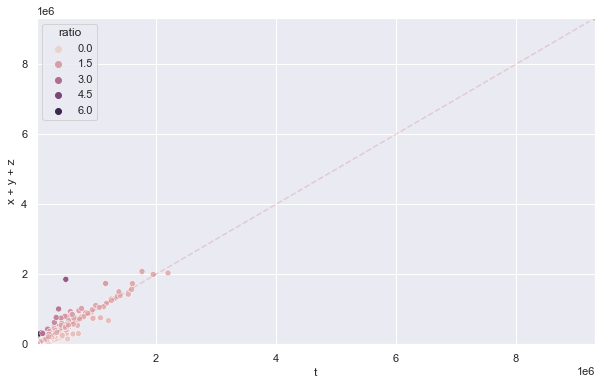

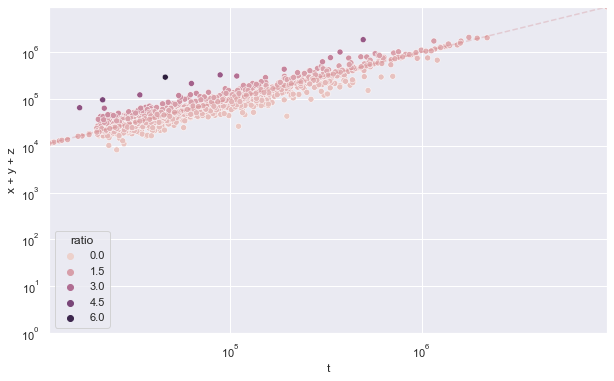

In [52]:
# attention, les 3 surfaces ne sont pas nécessairement renseignées
# pour ne pas mettre en échec la vérification, il faut remplacer les NA par 0
__data = _data.copy()
__data.LargestPropertyUseTypeGFA.fillna(0, inplace=True)
__data.SecondLargestPropertyUseTypeGFA.fillna(0, inplace=True)
__data.ThirdLargestPropertyUseTypeGFA.fillna(0, inplace=True)
ok, ko, re, ab = assert_relation(
    data=__data,
    features=['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA'],
    target='PropertyGFATotal',
    relation='x + y + z'
)

Distribution des pentes

median : 1.0
mean : 1.0019900082278819
modes : 0    1.0
Name: ratio, dtype: float64


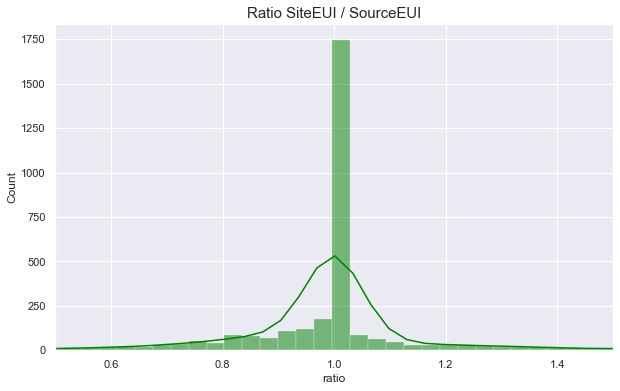

In [53]:
sns.histplot(data=ok, x='ratio', kde=True, bins=200, color='green')
plt.title('Ratio SiteEUI / SourceEUI', size=15)
#sns.histplot(data=inconst, x='ratio', kde=True, bins=200)
plt.xlim(0.5, 1.5)

print('median :', ok.ratio.median())
print('mean :', ok.ratio.mean())
print('modes :', ok.ratio.mode())  # c'est le mode qui nous indique les pics

median : 1.0
mean : 1.0019900082278819
modes : 0    1.0
Name: ratio, dtype: float64


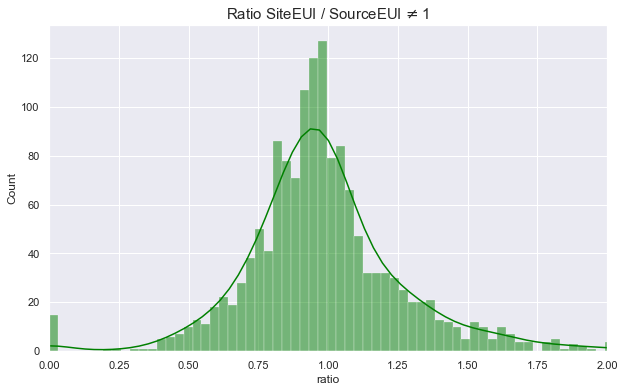

In [54]:
r = ok.ratio
sns.histplot(data=ok[(r - 1).abs() > 0.01], x='ratio', kde=True, bins=200, color='green')
plt.title(r'Ratio SiteEUI / SourceEUI $\ne$ 1', size=15)
#sns.histplot(data=inconst, x='ratio', kde=True, bins=200)
plt.xlim(0, 2)

print('median :', ok.ratio.median())
print('mean :', ok.ratio.mean())
print('modes :', ok.ratio.mode())  # c'est le mode qui nous indique les pics

28 % d'outliers c'est beaucoup!

Les low outliers peuvent s'expliquer par le fait que des surfaces d'usages annexes complètent les 3 surfaces d'usages principaux.

En revanche, les high outliers posent un sérieux problème puisqu'ils indiquent une surface totale supérieure à celle des usages particuliers. La seule explication autre que l'erreur, c'est le fait que des surfaces soient décomptées plusieurs fois en raison d'usages mixtes. Il faut pousser l'analyse sur cet aspect en observant de plus près les cas.

In [55]:
areas = _data[list(_data.columns[1:4]) + list(_data.columns[14:24])]
low_outliers = ko[ko.ratio < 1]
high_outliers = ko[ko.ratio > 1]
display(low_outliers)
display(areas.loc[low_outliers.index])
display(high_outliers)
display(areas.loc[high_outliers.index])


,t,x + y + z,ratio
id,,,
3,956110,756493.0,0.791220
13,63712,56132.0,0.881027
15,153163,133884.0,0.874128
24,57452,41688.0,0.725614
33,171866,128909.0,0.750055
...,...,...,...
50083,175844,123554.0,0.702634
50058,48230,42600.0,0.883268
50075,260051,210125.0,0.808015


,PrimaryPropertyType,PropertyName,Address,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified
id,,,,,,,,,,,,,
3,Hotel,5673-The Westin Seattle,1900 5th Avenue,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN
13,Mid-Rise Multifamily,Lyon Building,607 - 3rd Ave.,1496,62216,Multifamily Housing,Multifamily Housing,56132.0,NaN,NaN,NaN,NaN,NaN
15,Hotel,Hotel Monaco Seattle,1101 4th Avenue,19279,133884,Hotel,Hotel,133884.0,NaN,NaN,NaN,NaN,NaN
24,Mixed Use Property,The Rainier Club,820 4th Ave.,0,57452,"Office, Other, Other - Lodging/Residential, Re...",Social/Meeting Hall,16442.0,Restaurant,15505.0,Office,9741.0,NaN
33,Hotel,Marriott Springhill Suites (33),1800 Yale Ave,38281,133585,Hotel,Hotel,128909.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50083,Mid-Rise Multifamily,Smith & Burns Apartments,4455 Interlake Ave N,52045,123799,"Multifamily Housing, Parking",Multifamily Housing,99554.0,Parking,24000.0,NaN,NaN,NaN
50058,Low-Rise Multifamily,Wedgewood Estates Building A,3801 NE 77th St,0,48230,"Multifamily Housing, Parking",Multifamily Housing,26175.0,Parking,16425.0,NaN,NaN,NaN
50075,Mid-Rise Multifamily,Astro Apartments,315 1st Ave N,90503,169548,"Multifamily Housing, Parking",Multifamily Housing,145784.0,Parking,64341.0,NaN,NaN,NaN


,t,x + y + z,ratio
id,,,
18,315952,353111.0,1.117610
22,103911,130000.0,1.251071
43,494835,1856706.0,3.752172
46,714095,963000.0,1.348560
53,52554,58878.0,1.120333
...,...,...,...
50057,319481,396398.0,1.240756
50084,213952,289913.0,1.355038
50088,41403,46955.0,1.134097


,PrimaryPropertyType,PropertyName,Address,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified
id,,,,,,,,,,,,,
18,Hotel,Crowne Plaza Hotel Seattle,1113 6th Ave,57600,258352,"Hotel, Parking",Hotel,295511.0,Parking,57600.0,NaN,NaN,NaN
22,Other,Downtown Seattle YMCA,909 4th Avenue,0,103911,"Fitness Center/Health Club/Gym, Office, Swimmi...",Fitness Center/Health Club/Gym,90000.0,Office,40000.0,Swimming Pool,0.0,NaN
43,Mixed Use Property,Plant 2 Site,7755 E MARGINAL WAY S,0,494835,"Energy/Power Station, Laboratory, Manufacturin...",Office,757027.0,Laboratory,639931.0,Non-Refrigerated Warehouse,459748.0,NaN
46,Warehouse,Seattle 11-13,3301 S NORFOLK ST,0,714095,"Non-Refrigerated Warehouse, Office, Refrigerat...",Non-Refrigerated Warehouse,616000.0,Refrigerated Warehouse,276000.0,Office,71000.0,NaN
53,Small- and Mid-Sized Office,El Centro de la Raza,2524 16th Ave S,0,52554,"Office, Other - Education",Office,51029.0,Other - Education,7849.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50057,High-Rise Multifamily,Cirrus,2030 8th Ave,41915,277566,"Multifamily Housing, Office, Other - Lodging/R...",Multifamily Housing,308680.0,Other - Lodging/Residential,52538.0,Parking,35180.0,NaN
50084,Mid-Rise Multifamily,Rooster Apartments,900 NE 65th St,51739,162213,"Multifamily Housing, Parking",Multifamily Housing,154913.0,Parking,135000.0,NaN,NaN,NaN
50088,Low-Rise Multifamily,Vibe Apartments,3601 Greenwood Ave N,0,41403,"Multifamily Housing, Parking",Multifamily Housing,42014.0,Parking,4941.0,NaN,NaN,NaN


#### Le cas des parkings

In [56]:
def hlookup_parkings(data):
    _1st_is_parking = data[data.LargestPropertyUseType == 'Parking'].index
    _2nd_is_parking = data[data.SecondLargestPropertyUseType == 'Parking'].index
    _3rd_is_parking = data[data.ThirdLargestPropertyUseType == 'Parking'].index
    pos = pd.Series(data=-1, index=data.index, name='pos')
    pos[_1st_is_parking] = 1
    pos[_2nd_is_parking] = 2
    pos[_3rd_is_parking] = 3
    gfa = pd.Series(data=0, index=data.index, name='gfa')
    gfa[_1st_is_parking] = data.LargestPropertyUseTypeGFA[_1st_is_parking]
    gfa[_2nd_is_parking] = data.SecondLargestPropertyUseTypeGFA[_2nd_is_parking]
    gfa[_3rd_is_parking] = data.ThirdLargestPropertyUseTypeGFA[_3rd_is_parking]
    return pos, gfa
    

s_parkings = _data[['PropertyGFAParking']].copy()
s_parkings.columns = ['s']
s_parkings['p'], s_parkings['s_2'] = hlookup_parkings(data)
s_parkings['s - s_2'] = s_parkings.s - s_parkings.s_2

display(s_parkings)

,s,p,s_2,s - s_2
id,,,,
1,0,-1,0.0,0.0
2,15064,2,15064.0,0.0
3,196718,-1,0.0,196718.0
5,0,-1,0.0,0.0
8,62000,2,68009.0,-6009.0
...,...,...,...,...
50221,0,-1,0.0,0.0
50223,0,-1,0.0,0.0
50224,0,-1,0.0,0.0


Surprise : les cas inconsistants (144 + 172) dépassent en nombre les cas consistants (131 + (146)).

Le cas des 146 surfaces de parking non reportées dans les détails n'est pas nécessairement inconsistant.

Pour s'en assurer, il faut vérifier s'il n'y a pas 3 usages dont les surfaces dépassent celle du parking.

In [57]:
no_parking = s_parkings[(s_parkings.s == 0) & (s_parkings.s_2 == 0)]
print_subtitle(f'No parking ({no_parking.shape[0]})')
display(no_parking.head(3))

parking_ok = s_parkings[(s_parkings.s > 0) & (s_parkings['s - s_2'] == 0)]
print_subtitle(f'Parking areas are consistant ({parking_ok.shape[0]})')
display(parking_ok.head(3))

parking_ko_1 = s_parkings[(s_parkings.s > 0) & (s_parkings['s - s_2'] > 0) & (s_parkings.s_2 == 0)]
print_subtitle(f'Parking not in detailed uses s > 0, s_2 = 0 ({parking_ko_1.shape[0]})')
display(parking_ko_1)

parking_ko_2 = s_parkings[(s_parkings['s - s_2'] > 0) & (s_parkings.s_2 > 0)]
print_subtitle(f'Parking is under accounted s > s_2 > 0 ({parking_ko_2.shape[0]})')
display(parking_ko_2)

parking_ko_3 = s_parkings[(s_parkings['s - s_2'] < 0) & (s_parkings.s > 0)]
print_subtitle(f'Parking is over accounted s_2 > s > 0 ({parking_ko_3.shape[0]})')
display(parking_ko_3)


No parking (2133)


,s,p,s_2,s - s_2
id,,,,
1,0,-1,0.0,0.0
5,0,-1,0.0,0.0
10,0,-1,0.0,0.0



Parking areas are consistant (131)


,s,p,s_2,s - s_2
id,,,,
2,15064,2,15064.0,0.0
18,57600,2,57600.0,0.0
19,25200,2,25200.0,0.0



Parking not in detailed uses s > 0, s_2 = 0 (146)


,s,p,s_2,s - s_2
id,,,,
3,196718,-1,0.0,196718.0
9,37198,-1,0.0,37198.0
13,1496,-1,0.0,1496.0
15,19279,-1,0.0,19279.0
16,61161,-1,0.0,61161.0
...,...,...,...,...
50068,4222,-1,0.0,4222.0
50078,12223,-1,0.0,12223.0
50082,8254,-1,0.0,8254.0



Parking is under accounted s > s_2 > 0 (144)


,s,p,s_2,s - s_2
id,,,,
21,57000,2,49000.0,8000.0
63,146694,2,117668.0,29026.0
114,303707,2,185014.0,118693.0
115,25930,2,21454.0,4476.0
323,18504,2,17570.0,934.0
...,...,...,...,...
50074,14383,2,10664.0,3719.0
50075,90503,2,64341.0,26162.0
50093,8908,2,8126.0,782.0



Parking is over accounted s_2 > s > 0 (72)


,s,p,s_2,s - s_2
id,,,,
8,62000,2,68009.0,-6009.0
32,30301,2,42000.0,-11699.0
69,28200,2,28300.0,-100.0
96,9341,2,20868.0,-11527.0
102,44766,2,51537.0,-6771.0
...,...,...,...,...
49902,31916,2,32227.0,-311.0
50054,197659,2,202178.0,-4519.0
50084,51739,2,135000.0,-83261.0


## Energie / sa ventilation

**Q** - *L'énergie totale consommée est-elle bien la somme des 3 types d'énergies (vapeur, électricité, gaz) ?*

29 outliers :
* dans la majorité des cas, la consommation totale est supérieure aux 3 énergies. Cela laisse entendre, ce qui peut certainement être vérifié, que ces bâtiments consomment d'autres sources d'énergie.
* dans quelques cas, c'est l'inverse. Ce sont probablement les immeubles à consommation négative (électricité) ce qui signifie qu'ils produisent de l'énergie.

<mark>Voir la corrélation entre cette propriété et le rapport *source* / *site*.</mark>

# excluded : 4
# confirmed : 3207
# inconsistancies (ε = 1 / 1000) : 29 (0.904 %)
median ratio : 1.0
mean ratio : 0.997
ratio std dev : 0.049
ratio kurtosis : 345.407
ratio skew : -15.675


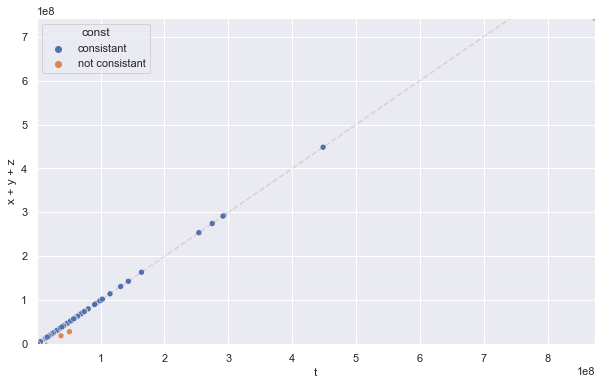

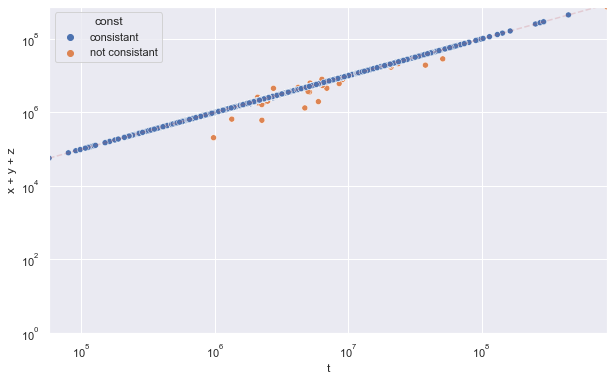

In [58]:
ok, ko, re, ab = assert_relation(
    data=_data,
    features=['NaturalGas(kBtu)', 'Electricity(kBtu)', 'SteamUse(kBtu)'],
    target='SiteEnergyUse(kBtu)',
    relation='x + y + z'
)

Qui sont les outliers ?

Pour quasiment tous, la somme minore le total enregistré.

La meilleure hypothèse est que cela correspond aux sources d'énergies autres que la vapeur, l'électricité et le gaz, comme notamment le fioul et autres sources 'sales'

https://en.wikipedia.org/wiki/Bullitt_Center : qui produit plus d'électricité qu'il n'en consomme, a été conçu comme le bâtiment commerciel le plus vert du monde.

In [59]:
ko['t - (x + y + z)'] = ko.t - ko['x + y + z']
display(ko)

,t,x + y + z,ratio,t - (x + y + z)
id,,,,
103,2.365898e+07,21200976.0,0.896107,2.458002e+06
106,2.095503e+07,17016015.0,0.812025,3.939011e+06
112,2.072325e+07,18649906.0,0.899951,2.073342e+06
561,9.058916e+06,7877393.0,0.869573,1.181523e+06
688,5.974994e+06,1966947.0,0.329197,4.008046e+06
700,1.252517e+07,0.0,0.000000,1.252517e+07
757,5.177270e+06,6287167.0,1.214379,-1.109896e+06
803,3.795171e+07,19295187.0,0.508414,1.865652e+07
19536,1.339221e+06,656634.0,0.490311,6.825866e+05


### Distribution des proportions de chaque énergie dans le mix

,x,y,z,t,x + y + z,%x,%y,%z
id,,,,,,,,
1,1.276453e+06,3.946027e+06,2003882.00,7.226362e+06,7.226362e+06,0.176638,0.546060,0.277302
2,5.145082e+06,3.242851e+06,0.00,8.387933e+06,8.387933e+06,0.613391,0.386609,0.000000
3,1.493800e+06,4.952666e+07,21566554.00,7.258702e+07,7.258702e+07,0.020579,0.682307,0.297113
5,1.811213e+06,2.768924e+06,2214446.25,6.794584e+06,6.794583e+06,0.266567,0.407519,0.325913
8,8.803998e+06,5.368607e+06,0.00,1.417261e+07,1.417260e+07,0.621198,0.378802,0.000000
...,...,...,...,...,...,...,...,...
50221,2.997200e+05,6.323620e+05,0.00,9.320821e+05,9.320820e+05,0.321560,0.678440,0.000000
50223,5.537300e+05,3.965461e+05,0.00,9.502762e+05,9.502760e+05,0.582704,0.417296,0.000000
50224,3.973739e+06,1.792159e+06,0.00,5.765898e+06,5.765898e+06,0.689180,0.310820,0.000000


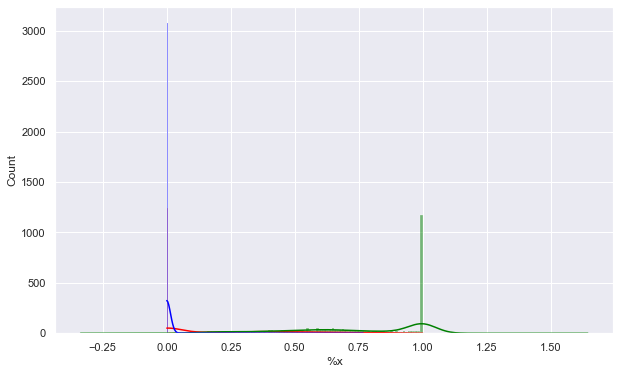

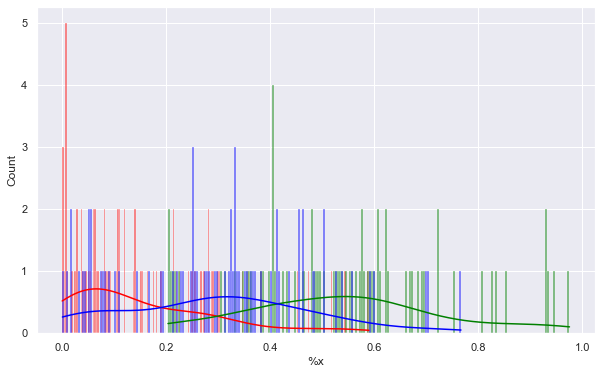

In [60]:
re = re.copy()
re[r'%x'] = re.x / re.t
re[r'%y'] = re.y / re.t
re[r'%z'] = re.z / re.t
display(re)
#sns.scatterplot(data=area, x=r'%x', y=r'%y') #, hue='class')
sns.histplot(data=re, x=r'%x', kde=True, bins=200, color='red')
sns.histplot(data=re, x=r'%y', kde=True, bins=200, color='green')
sns.histplot(data=re, x=r'%z', kde=True, bins=200, color='blue')
plt.show()
sns.histplot(data=re[(re.x > 0) & (re.y > 0) & (re.z > 0)], x=r'%x', kde=True, bins=200, color='red')
sns.histplot(data=re[(re.x > 0) & (re.y > 0) & (re.z > 0)], x=r'%y', kde=True, bins=200, color='green')
sns.histplot(data=re[(re.x > 0) & (re.y > 0) & (re.z > 0)], x=r'%z', kde=True, bins=200, color='blue')
plt.show()

In [61]:
a = re.copy()
c, s, mn, md, st = a.count(), a.sum(), a.mean(), a.median(), a.std()
a.loc['count'] = c
a.loc['sum'] = s
a.loc['mean'] = mn
a.loc['median'] = md
a.loc['std'] = st
display(a)

,x,y,z,t,x + y + z,%x,%y,%z
id,,,,,,,,
1,1.276453e+06,3.946027e+06,2.003882e+06,7.226362e+06,7.226362e+06,0.176638,0.546060,0.277302
2,5.145082e+06,3.242851e+06,0.000000e+00,8.387933e+06,8.387933e+06,0.613391,0.386609,0.000000
3,1.493800e+06,4.952666e+07,2.156655e+07,7.258702e+07,7.258702e+07,0.020579,0.682307,0.297113
5,1.811213e+06,2.768924e+06,2.214446e+06,6.794584e+06,6.794583e+06,0.266567,0.407519,0.325913
8,8.803998e+06,5.368607e+06,0.000000e+00,1.417261e+07,1.417260e+07,0.621198,0.378802,0.000000
...,...,...,...,...,...,...,...,...
count,3.207000e+03,3.207000e+03,3.207000e+03,3.207000e+03,3.207000e+03,3207.000000,3207.000000,3207.000000
sum,4.449748e+09,1.218827e+10,9.151453e+08,1.776572e+10,1.755316e+10,807.734262,2348.795539,41.187977
mean,1.387511e+06,3.800520e+06,2.853587e+05,5.539669e+06,5.473390e+06,0.251866,0.732396,0.012843


## Energie, surface et énergie/surface

Là, ce n'est pas très clean : comment ça s'explique ?

Zoomer.

# excluded : 0
# confirmed : 3211
# inconsistancies (ε = 1 / 1000) : 1198 (37.309 %)
median ratio : 0.999
mean ratio : 0.935
ratio std dev : 0.235
ratio kurtosis : 130.383
ratio skew : 7.016


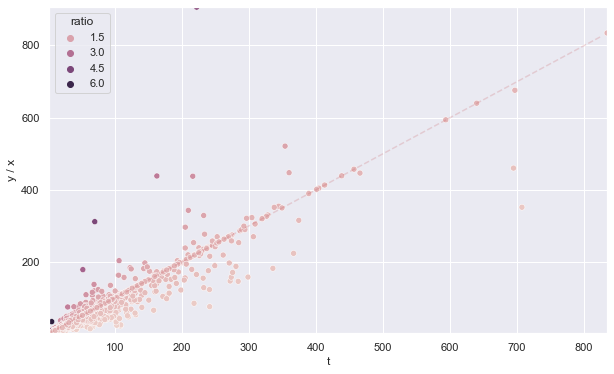

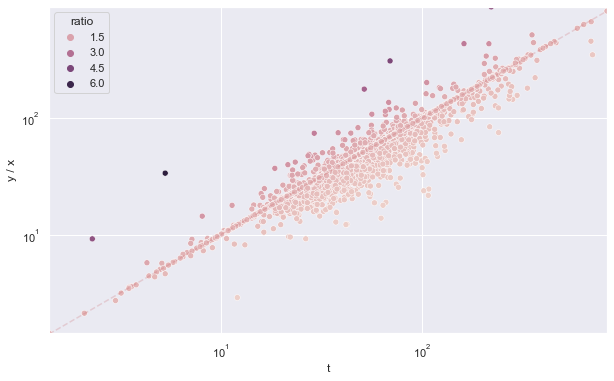

In [62]:
ok, ko, re, ab = assert_relation(
    data=_data,
    features=['PropertyGFATotal', 'SiteEnergyUse(kBtu)'],
    target='SiteEUI(kBtu/sf)',
    relation='y / x'
)

median : 0.9992036193584017
mean : 0.9354739299577786
modes : 0       0.201835
1       0.220833
2       0.227369
3       0.233190
4       0.238421
          ...   
3206    3.437694
3207    4.005543
3208    4.087194
3209    4.470185
3210    6.375433
Name: ratio, Length: 3211, dtype: float64


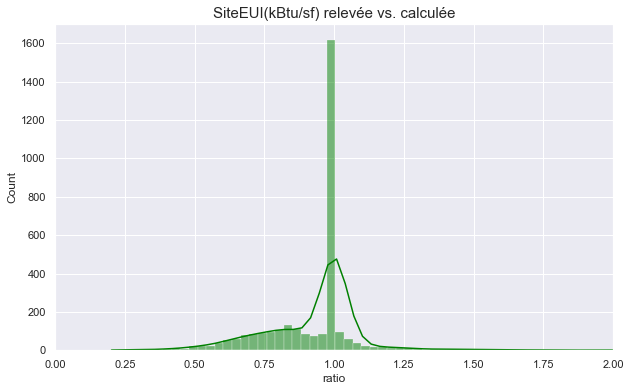

In [63]:
sns.histplot(data=ok, x='ratio', kde=True, bins=200, color='green')
plt.title('SiteEUI(kBtu/sf) relevée vs. calculée', size=15)
plt.xlim(0, 2)

print('median :', ok.ratio.median())
print('mean :', ok.ratio.mean())
print('modes :', ok.ratio.mode())  # c'est le mode qui nous indique les pics

## ✔ Emissions, surface et émissions/surface

Bilan :
* Rapport presque parfait : $I = 1000 G / S$ ($\sigma=0.017$)
* Exclusion de 4 dont les émissions sont (NaN, NaN) [1768, 2321, 2480, 3348] (idem gaz, électricité).
* 8 outliers qui s'expliquent tous par l'erreur de troncature (valeurs trop faibles cf. scale) [34, 380, 595, 609, 1049, 1658, 1994, 3206]

Conséquences :
* exclusion des 4 (NaN, NaN) du jeu de données (vérifier : si leur surface, et donc leur impact sur le résultat final, est négligeable).
* Ne conserver que les intensités, mais avec recalculer les valeurs pour évacuer l'erreur de troncature (précision actuelle à 10-2 insuffisante) : voir `seattle_commons.get_fixed_ghge_intensity`.

# excluded : 4
# confirmed : 3207
# inconsistancies (ε = 1 / 1000) : 8 (0.249 %)
median ratio : 1.0
mean ratio : 1.0
ratio std dev : 0.017
ratio kurtosis : 238.779
ratio skew : 7.945


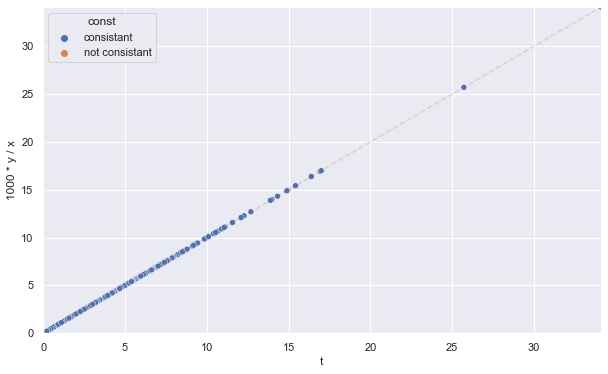

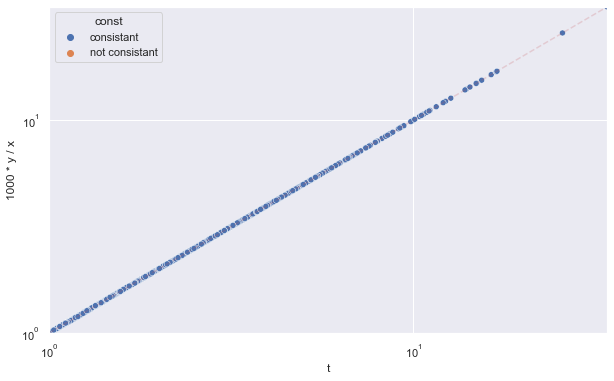

In [64]:
ok, ko, re, ab = assert_relation(
    data=_data,
    features=['PropertyGFATotal', 'TotalGHGEmissions'],
    target='GHGEmissionsIntensity',
    relation='1000 * y / x'
)

In [65]:
# aberrant : les individus dont les émissions ne sont pas renseignées
display(ab)

,x,y,t,1000 * y / x
id,,,,
23355,29357,NaN,NaN,NaN
25431,28472,NaN,NaN,NaN
25763,30420,NaN,NaN,NaN
50082,36685,NaN,NaN,NaN


In [66]:
# erreurs de troncature sur les individus dont les émissions sont faibles
display(ko)

,t,1000 * y / x,ratio
id,,,
41,0.04,0.035612,0.890300
533,0.02,0.024944,1.247189
797,0.01,0.014780,1.478011
813,0.02,0.024614,1.230719
20626,0.03,0.033433,1.114448
23020,0.03,0.025792,0.859725
24089,0.04,0.044049,1.101236
49784,-0.02,-0.015385,0.769231


## Localisation géographique

Avec la latitude et la longitude à l'échelle d'une ville, on peut déjà faire un scatter. A cette échelle, pas de problème de projection sphérique.

En bonus, on peut modifier la couleur suivant la couleur du quatier, et chacun des autres découpages administratifs.

En superbonus, insertion en fond de l'image aérienne de Seattle.

Le next step, c'est geopandas : https://geopandas.org/en/stable/gallery/plotting_basemap_background.html


In [67]:
import os
print(os.getcwd())

c:\Users\franc\Projects\pepper_carbon-neutral_seattle\jupyter


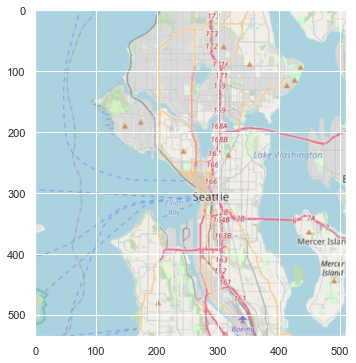

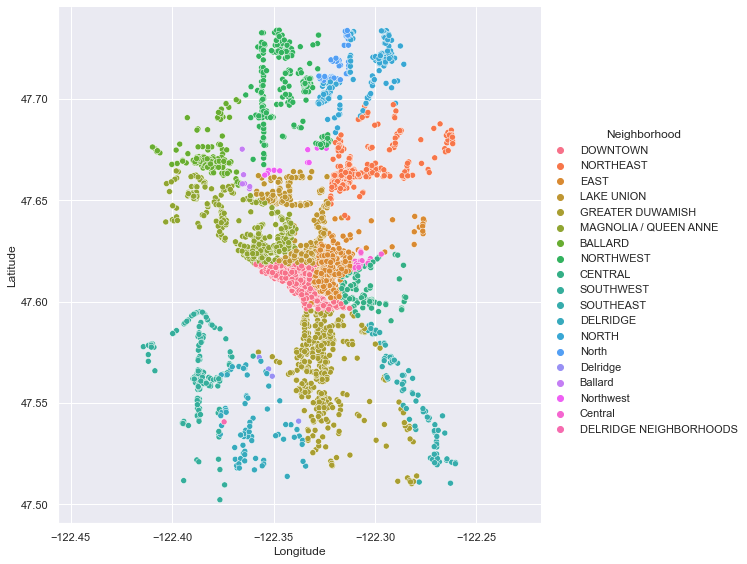

In [69]:
import matplotlib.image as mpimg
img = mpimg.imread('../img/seattle_map.png')
#f, ax = plt.subplots()
plt.imshow(img, zorder=.5)
import seaborn as sns
plot = sns.relplot(x='Longitude', y='Latitude', hue='Neighborhood', data=_data, height=8)
#plot.axes[0, 0].imshow(img, alpha=.5, zorder=1)
plt.axis('equal')
plt.show()

# le next 

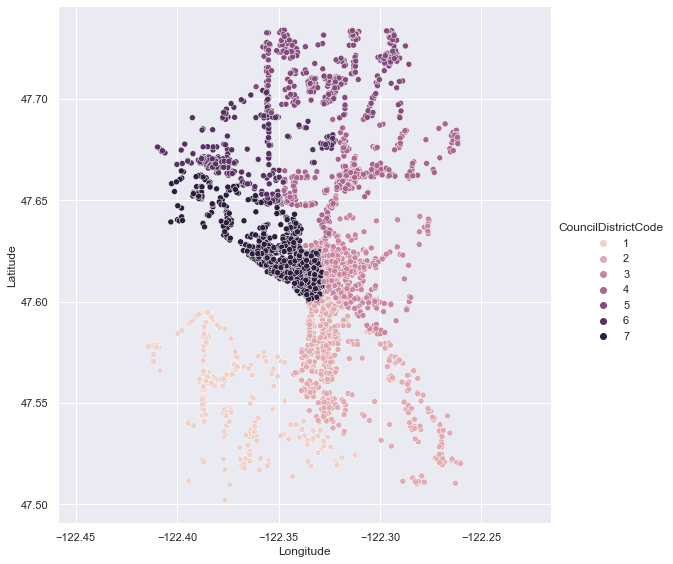

In [70]:
import seaborn as sns
sns.relplot(x='Longitude', y='Latitude', hue='CouncilDistrictCode', data=_data, height=8)
plt.axis('equal')
plt.show()

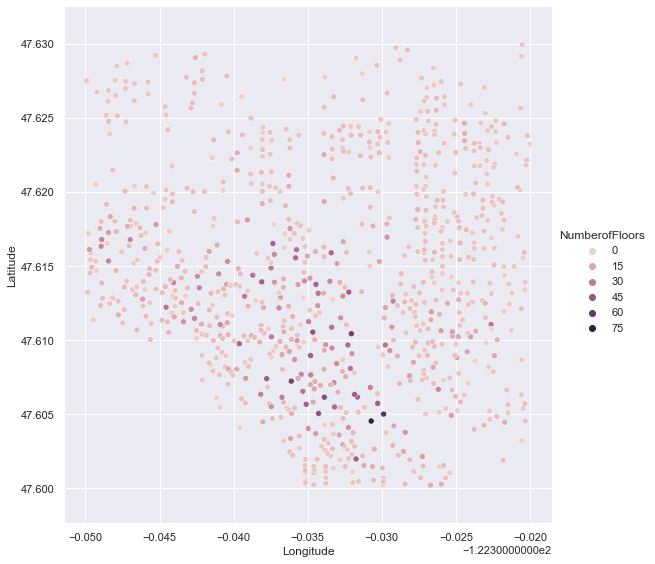

In [71]:
import seaborn as sns
#plt.xlim([-122.35, -122.32])
#plt.ylim([47.60, 47.63])

lng_limits = (-122.35 < _data.Longitude) & (_data.Longitude < -122.32)
lat_limits = (47.60 < _data.Latitude) & (_data.Latitude < 47.63)
_downtown = _data[lng_limits & lat_limits]

sns.relplot(x='Longitude', y='Latitude', hue='NumberofFloors', data=_downtown, height=8)
plt.axis('equal')
plt.show()